In [2]:
import pandas as pd
import numpy as np

# **Data Gathering**

## **Google News RapidAPI**

**Test Google News RapidAPI End Point to get raw data (Before Cleaning)**

In [ ]:
import requests
import json

# Set API Key
api_key = "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd"

# API Endpoint
url = "https://google-news22.p.rapidapi.com/v1/search"

# Headers
headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "google-news22.p.rapidapi.com"
}

# Query parameters
query = "streaming platforms convenience"
page = 1
querystring = {"q": query, "country": "us", "language": "en", "page": str(page)}

# Make the request
response = requests.get(url, headers=headers, params=querystring)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Print JSON with indentation
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "success": true,
    "total": 20,
    "data": [
        {
            "title": "7-Eleven Slurpee Campaign Scores With Spotify",
            "url": "https://csnews.com/7-eleven-slurpee-campaign-scores-spotify",
            "date": "2024-04-21T07:00:00+00:00",
            "thumbnail": "https://csnews.com/images/v/16_x_9_480/files/2023-06/flo_milli_friends_with_slurpees_500x281.jpg",
            "description": "Last year\u2019s \u201cAnything Flows\u201d campaign receives honors for innovative audio and overall quality.",
            "source": {
                "name": "Home Page | Convenience Store News",
                "url": "https://csnews.com",
                "favicon": "https://staticns.bonai.io/publisher/v0tpHze7dL40iWK6N9t61WSEMLmLdymG25ZxxNa1U"
            },
            "keywords": [
                "7-Eleven",
                "Slurpee",
                "Spotify",
                "ad campaign",
                "brand song"
            ],
 

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [ ]:
import requests
import pandas as pd

def fetch_google_news_data(api_key, query, topic_label, view_label, pages=3):
    """
    Fetch articles from Google News API for a specific query and label them.

    Parameters:
        api_key (str): Your Google News API key.
        query (str): The query string for the API.
        topic_label (str): The subtopic label.
        view_label (str): The core view label.
        pages (int): Number of pages to fetch.

    Returns:
        pd.DataFrame: A DataFrame containing the fetched articles.
    """
    url = "https://google-news22.p.rapidapi.com/v1/search"
    headers = {
        "x-rapidapi-key": api_key,
        "x-rapidapi-host": "google-news22.p.rapidapi.com"
    }
    all_articles = []

    for page in range(1, pages + 1):
        querystring = {"q": query, "country": "us", "language": "en", "page": str(page)}
        response = requests.get(url, headers=headers, params=querystring)

        if response.status_code == 200:
            data = response.json()
            articles = data.get("data", [])
            if not articles:
                print(f"No articles found for query: '{query}' on page {page}.")
                break

            for article in articles:
                all_articles.append({
                    "title": article.get("title"),
                    "url": article.get("url"),
                    "excerpt": article.get("excerpt", ""),
                    "topic_label": topic_label,
                    "view_label": view_label,
                    "query": query,
                    "page": page
                })
        else:
            print(f"Error: {response.status_code} for query: '{query}' on page {page}.")
            break

    return pd.DataFrame(all_articles)

# API Key
api_key = "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd"

# Define Topics and Queries
topics_and_queries = {
    "Accessibility and Convenience": {
        "Pro-Streaming": "streaming platforms convenience OR accessibility",
        "Pro-Theaters": "theater experience OR communal moviegoing"
    },
    "Economic Impact": {
        "Pro-Streaming": "streaming affordability OR cost-effective platforms",
        "Pro-Theaters": "economic benefits of theaters OR theater jobs"
    },
    "Artistic and Cultural Value": {
        "Pro-Streaming": "diversity in streaming films OR streaming global access",
        "Pro-Theaters": "cultural value of theaters OR artistic cinema experience"
    },
    "Future of the Industry": {
        "Pro-Streaming": "future of streaming platforms OR dominance of streaming",
        "Pro-Theaters": "future of theaters OR theaters adapting to streaming"
    }
}

# # Fetch data for all topics and views
# all_data = []

# for topic_label, views in topics_and_queries.items():
#     for view_label, query in views.items():
#         print(f"Fetching articles for topic: '{topic_label}', view: '{view_label}'")
#         topic_data = fetch_google_news_data(api_key, query, topic_label, view_label, pages=3)
#         all_data.append(topic_data)

# # Combine all data into a single DataFrame
# df_all_articles = pd.concat(all_data, ignore_index=True)

# # Save to CSV
# df_all_articles.to_csv("google_news_streaming_vs_theaters.csv", index=False)
# print(f"Saved {len(df_all_articles)} articles to 'google_news_streaming_vs_theaters.csv'")


Fetching articles for topic: 'Accessibility and Convenience', view: 'Pro-Streaming'
Fetching articles for topic: 'Accessibility and Convenience', view: 'Pro-Theaters'
Fetching articles for topic: 'Economic Impact', view: 'Pro-Streaming'
Fetching articles for topic: 'Economic Impact', view: 'Pro-Theaters'
Fetching articles for topic: 'Artistic and Cultural Value', view: 'Pro-Streaming'
Fetching articles for topic: 'Artistic and Cultural Value', view: 'Pro-Theaters'
Fetching articles for topic: 'Future of the Industry', view: 'Pro-Streaming'
Fetching articles for topic: 'Future of the Industry', view: 'Pro-Theaters'
Saved 168 articles to 'google_news_streaming_vs_theaters.csv'


In [ ]:
df_google_news_articles = pd.read_csv("google_news_streaming_vs_theaters.csv")
df_google_news_articles.head()

## **Newsapi.org API**

**Test NewsAPI.org End Point to get raw data (Before Cleaning)**

In [ ]:
import requests
import json

# NewsAPI Key
API_KEY = "f22a82cfd0be444c8a3d4035683ddd17"
BASE_URL = "https://newsapi.org/v2/everything"

# Define search query
query = "movie theaters unique experience OR cinematic immersion"
page = 1

# Define request parameters
params = {
    "q": query,
    "apiKey": API_KEY,
    "language": "en",
    "pageSize": 3,
    "page": page
}

# Make the API request
response = requests.get(BASE_URL, params=params)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Pretty-print the JSON data
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "status": "ok",
    "totalResults": 4,
    "articles": [
        {
            "source": {
                "id": null,
                "name": "Gizmodo.com"
            },
            "author": "Sabina Graves",
            "title": "Universal Studio\u2019s Fanfest Nights Want to Take You Into Star Trek, D&D, and More",
            "description": "Universal's answer to the Disney Parks' regular themed nights leverage a ton of licenses, from One Piece to Mario, to get you into the park this year.",
            "url": "https://gizmodo.com/universal-fan-fest-night-details-star-trek-dungeons-and-dragons-back-to-the-future-2000556203",
            "urlToImage": "https://gizmodo.com/app/uploads/2025/01/Universal-Fan-Fest-Nights.jpg",
            "publishedAt": "2025-01-29T17:00:50Z",
            "content": "Star Trek, One Piece, Jujutsu Kaisen, Back to the Future, Dungeons&amp; Dragons, plus the worlds of Super Nintendo and Harry Potter will take over Uni

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [ ]:
import requests
import pandas as pd
import time

# Your NewsAPI Key
API_KEY = "f22a82cfd0be444c8a3d4035683ddd17"
BASE_URL = "https://newsapi.org/v2/everything"

# Define search queries (Balanced across 4 topics)
queries = {
    "Accessibility and Convenience": {
        "Pro-Streaming": "streaming platforms accessibility OR Netflix convenience",
        "Pro-Theaters": "movie theaters unique experience OR cinematic immersion"
    },
    "Economic Impact": {
        "Pro-Streaming": "economic benefits of streaming OR Netflix cost-effectiveness",
        "Pro-Theaters": "economic impact of movie theaters OR theater job creation"
    },
    "Artistic and Cultural Value": {
        "Pro-Streaming": "streaming promotes diverse movies OR indie films on Netflix",
        "Pro-Theaters": "cultural value of movie theaters OR importance of big screen"
    },
    "Future of the Industry": {
        "Pro-Streaming": "future of streaming movies OR dominance of streaming",
        "Pro-Theaters": "future of movie theaters OR adaptation to streaming"
    }
}

def fetch_articles(query, topic_label, view_label, max_results=50, pages=5):
    """
    Fetches articles from NewsAPI.org for a given query while ensuring we do not exceed topic-specific limits.

    Parameters:
    - query (str): Search term used to fetch articles.
    - topic_label (str): The topic category (e.g., Economic Impact).
    - view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
    - max_results (int): Max number of articles per query (default: 50 per view per topic).
    - pages (int): Number of pages to iterate through.

    Returns:
    - List of dictionaries containing article data.
    """
    articles = []
    articles_count = 0

    for page in range(1, pages + 1):
        if articles_count >= max_results:
            break  # Stop when reaching the max allowed per query

        print(f"Fetching page {page} for '{query}'...")

        params = {
            "q": query,
            "apiKey": API_KEY,
            "language": "en",
            "pageSize": min(max_results // pages, 10),  # Distribute evenly
            "page": page
        }

        response = requests.get(BASE_URL, params=params)

        if response.status_code == 200:
            data = response.json()
            for article in data.get("articles", []):
                if articles_count >= max_results:
                    break  # Stop when max per query is reached

                articles.append({
                    "title": article.get("title", "No Title"),
                    "url": article.get("url", "No URL"),
                    "excerpt": article.get("description", "No description"),
                    "topic_label": topic_label,
                    "view_label": view_label,
                    "query": query,
                    "page": page
                })
                articles_count += 1

        else:
            print(f"Error fetching '{query}' on page {page}: {response.status_code}")

        time.sleep(1)  # Pause to prevent rate limiting

    return articles


# # Collect data for all topics and views
# all_articles = []

# for topic_label, views in queries.items():
#     for view_label, query in views.items():
#         print(f"Fetching up to 50 articles for '{topic_label}' - '{view_label}'...")
#         articles = fetch_articles(query, topic_label, view_label, max_results=50, pages=5)
#         all_articles.extend(articles)

# # Convert to DataFrame and Save
# df_newsapi_articles = pd.DataFrame(all_articles)

# # Save to CSV
# df_newsapi_articles.to_csv("newsapi_articles_max400.csv", index=False)

# print(f"Saved {len(df_newsapi_articles)} articles to 'newsapi_articles_max400.csv'.")


Fetching up to 50 articles for 'Accessibility and Convenience' - 'Pro-Streaming'...
Fetching page 1 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 2 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 3 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 4 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching page 5 for 'streaming platforms accessibility OR Netflix convenience'...
Fetching up to 50 articles for 'Accessibility and Convenience' - 'Pro-Theaters'...
Fetching page 1 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 2 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 3 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 4 for 'movie theaters unique experience OR cinematic immersion'...
Fetching page 5 for 'movie theaters unique experience OR cinematic immersion'...
Fetching up to 50 

## **Web Scraping: Guardian News Wesbite**


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from googlesearch import search  # Make sure you have `googlesearch-python` installed

# User-Agent header to mimic real browser requests
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

def get_guardian_links(topic_queries, max_results=25):
    """
    Uses Google Search to find Guardian articles related to a specific OTT vs. Theaters topic.

    Parameters:
    - topic_queries (list): A list of topic search queries (e.g., ["Netflix impact on theaters site:theguardian.com"]).
    - max_results (int): Number of Guardian article links to collect per query.

    Returns:
    - List of Guardian article URLs.
    """
    urls = []
    for query in topic_queries:
        print(f"Searching for: {query}")
        try:
            for url in search(query, stop=max_results, pause=2):  # Avoid `num_results` error
                if "theguardian.com" in url and url not in urls:
                    urls.append(url)
        except Exception as e:
            print(f"Google search failed for {query}: {str(e)}")

    print(f"Total Guardian articles found: {len(urls)}")
    return urls

def scrape_guardian_article(url, topic_label, view_label, query):
    """
    Scrapes a Guardian article for title, URL, and excerpt.

    Parameters:
    - url (str): Article URL.
    - topic_label (str): The category of the article (e.g., Economic Impact).
    - view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
    - query (str): The search query used.

    Returns:
    - Dict with article details.
    """
    print(f"Scraping article: {url}")

    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        if response.status_code != 200:
            return None

        soup = BeautifulSoup(response.text, "html.parser")

        # Extract Title
        title_tag = soup.find("h1")
        title = title_tag.text.strip() if title_tag else "No Title"

        # Extract Description
        excerpt_tag = soup.find("meta", {"name": "description"})
        excerpt = excerpt_tag["content"] if excerpt_tag else "No description"

        return {
            "title": title,
            "url": url,
            "excerpt": excerpt,
            "topic_label": topic_label,
            "view_label": view_label,
            "query": query,
            "page": 1  # Since we get links directly, no pagination needed
        }

    except Exception as e:
        print(f"Failed to scrape {url}: {str(e)}")
        return None

# **Updated Queries (One Query per Search)**
queries = {
    "Economic Impact": {
        "Pro-Streaming": [
            "Netflix impact on theaters site:theguardian.com",
            "Disney+ effect on box office site:theguardian.com",
            "OTT revenue vs theaters site:theguardian.com"
        ],
        "Pro-Theaters": [
            "economic benefits of movie theaters site:theguardian.com",
            "box office recovery post-streaming site:theguardian.com",
            "theaters job creation site:theguardian.com"
        ]
    },
    "Future of the Industry": {
        "Pro-Streaming": [
            "will streaming replace theaters site:theguardian.com",
            "future of Netflix and cinemas site:theguardian.com",
            "Amazon Prime vs movie theaters site:theguardian.com"
        ],
        "Pro-Theaters": [
            "how theaters can survive streaming site:theguardian.com",
            "cinemas adapting to digital streaming site:theguardian.com",
            "importance of theaters in film industry site:theguardian.com"
        ]
    }
}

# **Scrape Articles**
all_articles = []

for topic_label, perspectives in queries.items():
    for view_label, query_list in perspectives.items():
        print(f"\nFetching articles for '{topic_label}' - '{view_label}'...")

        # Get Guardian article links from Google Search
        article_urls = get_guardian_links(query_list, max_results=25)

        for url in article_urls:
            article_data = scrape_guardian_article(url, topic_label, view_label, query_list[0])
            if article_data:
                all_articles.append(article_data)
            time.sleep(1)  # Respect website request limits

# **Convert to DataFrame & Save**
df_guardian_articles = pd.DataFrame(all_articles)
df_guardian_articles.to_csv("guardian_articles_OTT_vs_Theaters.csv", index=False)

print(f"Saved {len(df_guardian_articles)} articles to 'guardian_articles_OTT_vs_Theaters.csv'.")



Fetching articles for 'Economic Impact' - 'Pro-Streaming'...
Searching for: Netflix impact on theaters site:theguardian.com
Searching for: Disney+ effect on box office site:theguardian.com
Searching for: OTT revenue vs theaters site:theguardian.com
Total Guardian articles found: 49
Scraping article: https://www.theguardian.com/film/2019/apr/07/banning-netflix-real-danger-films-future
Scraping article: https://www.theguardian.com/media/2022/feb/05/stream-big-how-netflix-changed-the-tv-landscape-in-10-years
Scraping article: https://www.theguardian.com/commentisfree/2019/dec/12/streaming-giants-cinema-history-sites-netflix
Scraping article: https://www.theguardian.com/film/2018/aug/31/netflix-release-model-oscar-films-alfonso-cuaron
Scraping article: https://www.theguardian.com/commentisfree/2021/jul/16/the-guardian-view-on-the-future-of-cinema-dont-panic
Scraping article: https://www.theguardian.com/film/2019/jan/22/uk-cinemas-buck-netflix-doomsayers-with-best-year-since-1970
Scraping 

## **RapidAPI's News API**

**Test RapidAPI's News API End Point to get raw data (Before Cleaning)**

In [ ]:
import requests
import json

# API Details
url = "https://news-api14.p.rapidapi.com/v2/search/articles"
headers = {
    "x-rapidapi-key": "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd",
    "x-rapidapi-host": "news-api14.p.rapidapi.com"
}

# Define search query
query = "movie theaters unique experience OR cinematic immersion"
page = 1
articles_per_page = 1

# Query parameters
querystring = {
    "query": query,
    "country": "us",
    "language": "en",
    "page": str(page),
    "pageSize": str(articles_per_page)
}

# Make the API request
response = requests.get(url, headers=headers, params=querystring)

# Check response status
if response.status_code == 200:
    data = response.json()
    print("Raw JSON Data Before Cleaning:\n")
    print(json.dumps(data, indent=4))  # Pretty-print the JSON data
else:
    print(f"Error: Unable to fetch data, Status Code: {response.status_code}")


Raw JSON Data Before Cleaning:

{
    "success": true,
    "size": 10,
    "totalHits": 10000,
    "hitsPerPage": 10,
    "page": 1,
    "totalPages": 1000,
    "timeMs": 559,
    "data": [
        {
            "title": "London culture: immersive experiences, art, cinema, theatre and more",
            "url": "https://secretldn.com/culture/page/135/",
            "excerpt": "Your guide to the best in art and culture: exhibitions, plays, musicals and concerts. Check what\u2019s on at London galleries, museums, cinemas and theatres.",
            "thumbnail": null,
            "language": "en",
            "paywall": false,
            "contentLength": 561,
            "date": "2025-02-05T09:59:29+00:00",
            "authors": [],
            "keywords": [],
            "publisher": {
                "name": "Secret London",
                "url": "https://secretldn.com",
                "favicon": "https://staticns.bonai.io/publisher/bMMb0kCT9DHNwhgR9xSJiGfYcMkHcp63XGc81DWlPZE"
      

**Fetching data and store raw in a dataframe (without vectorizing) with labels.**

In [ ]:
import requests
import pandas as pd
import time

def fetch_articles(api_url, headers, queries, topic_label, view_label, max_pages=10, articles_per_page=10):
    """
    Fetches articles from News API while ensuring correct distribution.

    Parameters:
        api_url (str): API endpoint.
        headers (dict): API authentication headers.
        queries (list): Search queries for the API.
        topic_label (str): Topic category (e.g., Economic Impact).
        view_label (str): Perspective (Pro-Streaming or Pro-Theaters).
        max_pages (int): Number of pages per query.
        articles_per_page (int): Number of articles per request.

    Returns:
        pd.DataFrame: DataFrame of retrieved articles.
    """
    all_articles = []

    for query in queries:
        print(f"Fetching articles for '{topic_label}' - '{view_label}' - Query: '{query}'")

        articles_count = 0

        for page in range(1, max_pages + 1):
            if articles_count >= (max_pages * articles_per_page):
                break

            querystring = {
                "query": query,
                "country": "us",
                "language": "en",
                "page": str(page),
                "pageSize": str(articles_per_page)
            }

            response = requests.get(api_url, headers=headers, params=querystring)

            if response.status_code == 200:
                data = response.json()
                articles = data.get("data", [])

                if not articles:
                    print(f"No articles found for query: '{query}' on page {page}.")
                    break

                for article in articles:
                    if articles_count >= (max_pages * articles_per_page):
                        break

                    all_articles.append({
                        "title": article.get("title", "No Title"),
                        "url": article.get("url", "No URL"),
                        "excerpt": article.get("excerpt", "No description"),
                        "topic_label": topic_label,
                        "view_label": view_label,
                        "query": query,
                        "page": page
                    })
                    articles_count += 1

            else:
                print(f"Error: {response.status_code} for query: '{query}' on page {page}")
                break

            time.sleep(1)

    return pd.DataFrame(all_articles)

def fetch_and_save_articles_by_topic(selected_topic):
    """
    Fetches and saves articles for a specific topic.

    Parameters:
        selected_topic (str): The topic to fetch articles for (e.g., "Economic Impact").
    """
    url = "https://news-api14.p.rapidapi.com/v2/search/articles"
    headers = {
        "x-rapidapi-key": "823d0c4142msh2a3a354852b3a4ep13402djsn9c823368e0dd",
        "x-rapidapi-host": "news-api14.p.rapidapi.com"
    }

    queries_by_topic = {
        "Accessibility and Convenience": {
            "Pro-Streaming": [
                "streaming platforms accessibility",
                "Netflix convenience for watching movies",
                "on-demand movie streaming benefits",
                "Disney+ vs theaters experience",
                "how streaming services improve accessibility"
            ],
            "Pro-Theaters": [
                "movie theaters immersive experience",
                "why movie theaters are better than streaming",
                "cinematic experience vs home streaming",
                "big screen movie watching advantages",
                "movie theaters vs streaming platforms debate"
            ]
        },
        "Economic Impact": {
            "Pro-Streaming": [
                "economic benefits of streaming platforms",
                "how Netflix affects the film industry",
                "cost-effectiveness of streaming movies",
                "revenue impact of streaming services",
                "streaming services vs box office revenue"
            ],
            "Pro-Theaters": [
                "economic impact of movie theaters",
                "how theaters contribute to local economy",
                "jobs created by cinema industry",
                "financial impact of theaters closing",
                "theater box office revenue trends"
            ]
        },
        "Artistic and Cultural Value": {
            "Pro-Streaming": [
                "how streaming promotes indie films",
                "Netflix diversity in movie content",
                "artistic value of streaming platforms",
                "cultural shift towards streaming movies",
                "impact of streaming on independent filmmakers"
            ],
            "Pro-Theaters": [
                "cultural value of movie theaters",
                "how cinemas preserve the art of filmmaking",
                "importance of theaters in film industry",
                "cinema tradition vs digital streaming",
                "theaters as cultural movie experience"
            ]
        },
        "Future of the Industry": {
            "Pro-Streaming": [
                "future of movie streaming services",
                "will streaming replace movie theaters",
                "dominance of streaming in entertainment",
                "Netflix shaping future of cinema",
                "impact of streaming on film industry"
            ],
            "Pro-Theaters": [
                "future of movie theaters in digital age",
                "can theaters survive streaming era",
                "how theaters adapt to streaming competition",
                "cinema sustainability against streaming",
                "importance of theaters in movie future"
            ]
        }
    }

    if selected_topic not in queries_by_topic:
        print(f"Error: The selected topic '{selected_topic}' is not valid.")
        return

    print(f"\nFetching articles for topic: {selected_topic}...\n")

    all_articles = []

    for view_label, query_list in queries_by_topic[selected_topic].items():
        print(f"Fetching up to 100 articles for '{selected_topic}' - '{view_label}'...")

        # Fetch articles for each view (Pro-Streaming & Pro-Theaters)
        df = fetch_articles(
            api_url=url,
            headers=headers,
            queries=query_list,
            topic_label=selected_topic,
            view_label=view_label,
            max_pages=5,
            articles_per_page=10
        )

        all_articles.append(df)  # Append articles from both views

    # **Merge Both Pro-Streaming & Pro-Theaters for the Topic**
    final_df = pd.concat(all_articles, ignore_index=True)

    # **Convert Topic Name to Filename Format**
    filename = f"{selected_topic.replace(' ', '_')}.csv"
    final_df.to_csv(filename, index=False)

    print(f"Saved {len(final_df)} articles to '{filename}'.\n")
    print("Data collection complete. Change the topic and run again for another dataset.")



In [ ]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Accessibility and Convenience")


Fetching articles for topic: Accessibility and Convenience...

Fetching up to 100 articles for 'Accessibility and Convenience' - 'Pro-Streaming'...
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'streaming platforms accessibility'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'Netflix convenience for watching movies'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'on-demand movie streaming benefits'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'Disney+ vs theaters experience'
Fetching articles for 'Accessibility and Convenience' - 'Pro-Streaming' - Query: 'how streaming services improve accessibility'
Fetching up to 100 articles for 'Accessibility and Convenience' - 'Pro-Theaters'...
Fetching articles for 'Accessibility and Convenience' - 'Pro-Theaters' - Query: 'movie theaters immersive experience'
Fetching articles for 'Accessibility and Convenie

In [ ]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Economic Impact")


Fetching articles for topic: Economic Impact...

Fetching up to 100 articles for 'Economic Impact' - 'Pro-Streaming'...
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'economic benefits of streaming platforms'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'how Netflix affects the film industry'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'cost-effectiveness of streaming movies'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'revenue impact of streaming services'
Fetching articles for 'Economic Impact' - 'Pro-Streaming' - Query: 'streaming services vs box office revenue'
Fetching up to 100 articles for 'Economic Impact' - 'Pro-Theaters'...
Fetching articles for 'Economic Impact' - 'Pro-Theaters' - Query: 'economic impact of movie theaters'
Fetching articles for 'Economic Impact' - 'Pro-Theaters' - Query: 'how theaters contribute to local economy'
Fetching articles for 'Economic Impact' - 'Pro-Theaters' 

In [ ]:
# **Call Function with a Selected Topic**
# fetch_and_save_articles_by_topic("Artistic and Cultural Value")


Fetching articles for topic: Artistic and Cultural Value...

Fetching up to 100 articles for 'Artistic and Cultural Value' - 'Pro-Streaming'...
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'how streaming promotes indie films'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'Netflix diversity in movie content'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'artistic value of streaming platforms'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'cultural shift towards streaming movies'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Streaming' - Query: 'impact of streaming on independent filmmakers'
Fetching up to 100 articles for 'Artistic and Cultural Value' - 'Pro-Theaters'...
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Theaters' - Query: 'cultural value of movie theaters'
Fetching articles for 'Artistic and Cultural Value' - 'Pro-Th

In [ ]:
# **Call Function with a Selected Topic**
fetch_and_save_articles_by_topic("Future of the Industry")


Fetching articles for topic: Future of the Industry...

Fetching up to 100 articles for 'Future of the Industry' - 'Pro-Streaming'...
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'future of movie streaming services'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'will streaming replace movie theaters'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'dominance of streaming in entertainment'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'Netflix shaping future of cinema'
Fetching articles for 'Future of the Industry' - 'Pro-Streaming' - Query: 'impact of streaming on film industry'
Fetching up to 100 articles for 'Future of the Industry' - 'Pro-Theaters'...
Fetching articles for 'Future of the Industry' - 'Pro-Theaters' - Query: 'future of movie theaters in digital age'
Fetching articles for 'Future of the Industry' - 'Pro-Theaters' - Query: 'can theaters survive streaming era'


In [ ]:
# import pandas as pd

# # File paths
# file_paths = [
#     "Future_of_the_Industry.csv",
#     "Artistic_and_Cultural_Value.csv",
#     "Economic_Impact.csv",
#     "Accessibility_and_Convenience.csv",
#     "guardian_articles_OTT_vs_Theaters.csv",
#     "newsapi_articles_max400.csv",
#     "google_news_streaming_vs_theaters.csv"
# ]

# # Load and concatenate all CSV files into a single DataFrame
# df_combined = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# # Save the combined DataFrame to a new CSV file
# combined_file_path = "combined_articles_data.csv"
# df_combined.to_csv(combined_file_path, index=False)


In [ ]:
df_combined = pd.read_csv("combined_articles_data.csv")

In [ ]:
df_combined

title  \
0     12 Days of Streaming: daily must-watch movies ...   
1         Bundling may be in streaming service’s future   
2     Stacey Sher on the future of movies and streaming   
3     Movies to stream in December: our expert’s 12 ...   
4     Movies to stream in January: our expert’s 10 m...   
...                                                 ...   
3489  Stacey Sher on the future of movies and streaming   
3490  2024 Book-to-Screen Adaptations to Add to Your...   
3491  What ‘Dune: Part 2’ spicing up the box office ...   
3492  Upcoming Stephen King Movies, TV Miniseries An...   
3493  Stacey Sher on the future of movies and streaming   

                                                    url  \
0     https://www.t3.com/news/12-days-of-christmas-s...   
1     https://www.whec.com/top-news/bundling-may-be-...   
2     https://www.mckinsey.com/industries/technology...   
3     https://www.yahoo.com/entertainment/movies-str...   
4     https://www.whattowatch.com/features/movies-to...   
...                                                 ...   
3489  https://www.mckinsey.com/industries/technology...   
3490  https://www.vulture.com/article/book-adaptatio...   
3491  https://news.northeastern.edu/2024/03/20/dune-...   
3492  https://www.cinemablend.com/news/1715420/upcom...   
3493  https://www.mckinsey.com/industries/technology...   

                                                excerpt  \
0     T3 brings you a daily must-watch movie to enjo...   
1     ROCHESTER, N.Y. — Could streaming giants be ma...   
2     The veteran producer of such hits as Pulp Fict...   
3     From Netflix to Disney Plus, here are 12 movie...   
4     Brand new movies and some classics to enjoy th...   
...                                                 ...   
3489                                                NaN   
3490                                                NaN   
3491                                                NaN   
3492                                                NaN   
3493                                                NaN   

                 topic_label     view_label  \
0     Future of the Industry  Pro-Streaming   
1     Future of the Industry  Pro-Streaming   
2     Future of the Industry  Pro-Streaming   
3     Future of the Industry  Pro-Streaming   
4     Future of the Industry  Pro-Streaming   
...                      ...            ...   
3489  Future of the Industry   Pro-Theaters   
3490  Future of the Industry   Pro-Theaters   
3491  Future of the Industry   Pro-Theaters   
3492  Future of the Industry   Pro-Theaters   
3493  Future of the Industry   Pro-Theaters   

                                                  query  page  
0                    future of movie streaming services     1  
1                    future of movie streaming services     1  
2                    future of movie streaming services     1  
3                    future of movie streaming services     1  
4                    future of movie streaming services     1  
...                                                 ...   ...  
3489  future of theaters OR theaters adapting to str...     2  
3490  future of theaters OR theaters adapting to str...     3  
3491  future of theaters OR theaters adapting to str...     3  
3492  future of theaters OR theaters adapting to str...     3  
3493  future of theaters OR theaters adapting to str...     3  

[3494 rows x 7 columns]

In [ ]:
df_combined.shape

(3494, 7)

In [ ]:
df_combined.columns

Index(['title', 'url', 'excerpt', 'topic_label', 'view_label', 'query',
       'page'],
      dtype='object')

In [ ]:
df_combined['topic_label'].value_counts()

topic_label
Economic Impact                  1209
Accessibility and Convenience     944
Future of the Industry            779
Artistic and Cultural Value       562
Name: count, dtype: int64

In [ ]:
df_combined['view_label'].value_counts()

view_label
Pro-Streaming    1871
Pro-Theaters     1623
Name: count, dtype: int64

# **Data Cleaning**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the combined dataset
file_path = "combined_articles_data.csv"
df = pd.read_csv(file_path)

# Ensure relevant columns exist
text_column = "excerpt" if "excerpt" in df.columns else "title"

# Drop rows with missing text data
df = df.dropna(subset=[text_column])

# Function to clean text (remove stopwords, numbers, punctuation, and extra spaces)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        tokens = nltk.word_tokenize(text)  # Tokenize

        # **Remove stopwords and single-character words**
        tokens = [word for word in tokens if word not in stopwords.words('english') and len(word.strip()) > 1]

        return " ".join(tokens)

    return ""

# Apply text cleaning
df["cleaned_text"] = df[text_column].apply(clean_text)

# Step 1: Save Original Cleaned Data (Without Title)
cleaned_file_path = "cleaned_articles.csv"
df[["cleaned_text", "topic_label", "view_label"]].to_csv(cleaned_file_path, index=False)

# Step 2: Apply Stemming (Maintain labels, remove title)
stemmer = PorterStemmer()
df["stemmed_text"] = df["cleaned_text"].apply(lambda x: " ".join([stemmer.stem(word) for word in nltk.word_tokenize(str(x))]))
stemmed_file_path = "stemmed_articles.csv"
df[["stemmed_text", "topic_label", "view_label"]].to_csv(stemmed_file_path, index=False)

# Step 3: Apply Lemmatization (Maintain labels, remove title)
lemmatizer = WordNetLemmatizer()
df["lemmatized_text"] = df["cleaned_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(str(x))]))
lemmatized_file_path = "lemmatized_articles.csv"
df[["lemmatized_text", "topic_label", "view_label"]].to_csv(lemmatized_file_path, index=False)

# Step 4: Count Vectorization (Include labels, remove title)
count_vectorizer = CountVectorizer(max_df=0.85, min_df=2, max_features=1000)
count_matrix = count_vectorizer.fit_transform(df["cleaned_text"])
df_count_vectorized = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
df_count_vectorized.insert(0, "topic_label", df["topic_label"])
df_count_vectorized.insert(1, "view_label", df["view_label"])
count_vectorized_file_path = "count_vectorized_articles.csv"
df_count_vectorized.to_csv(count_vectorized_file_path, index=False)

# Step 5: TF-IDF Vectorization (Include labels, remove title)
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_text"])
df_tfidf_vectorized = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf_vectorized.insert(0, "topic_label", df["topic_label"])
df_tfidf_vectorized.insert(1, "view_label", df["view_label"])
tfidf_vectorized_file_path = "tfidf_vectorized_articles.csv"
df_tfidf_vectorized.to_csv(tfidf_vectorized_file_path, index=False)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df_cleaned = pd.read_csv("cleaned_articles.csv")
df_cleaned

cleaned_text  \
0     brings daily mustwatch movie enjoy december ja...   
1     rochester ny could streaming giants making cha...   
2     veteran producer hits pulp fiction erin brocko...   
3     netflix disney plus movies going want miss lan...   
4                 brand new movies classics enjoy month   
...                                                 ...   
3320  comfort movies way go january best best feelgo...   
3321  dimly remember hearing late sequel moana going...   
3322  free tv cables true wireless typec transmitter...   
3323  exclusive shortly winning sundance documentary...   
3324  dog manstarring voices lil rel howery pete dav...   

                 topic_label     view_label  
0     Future of the Industry  Pro-Streaming  
1     Future of the Industry  Pro-Streaming  
2     Future of the Industry  Pro-Streaming  
3     Future of the Industry  Pro-Streaming  
4     Future of the Industry  Pro-Streaming  
...                      ...            ...  
3320  Future of the Industry   Pro-Theaters  
3321  Future of the Industry   Pro-Theaters  
3322  Future of the Industry   Pro-Theaters  
3323  Future of the Industry   Pro-Theaters  
3324  Future of the Industry   Pro-Theaters  

[3325 rows x 3 columns]

In [ ]:
df_stemming = pd.read_csv("stemmed_articles.csv")
df_stemming

stemmed_text  \
0       bring daili mustwatch movi enjoy decemb januari   
1     rochest ny could stream giant make chang meet ...   
2     veteran produc hit pulp fiction erin brockovic...   
3     netflix disney plu movi go want miss land stre...   
4                    brand new movi classic enjoy month   
...                                                 ...   
3320  comfort movi way go januari best best feelgood...   
3321  dimli rememb hear late sequel moana go moana s...   
3322  free tv cabl true wireless typec transmitt hdm...   
3323  exclus shortli win sundanc documentari special...   
3324  dog manstar voic lil rel howeri pete davidson ...   

                 topic_label     view_label  
0     Future of the Industry  Pro-Streaming  
1     Future of the Industry  Pro-Streaming  
2     Future of the Industry  Pro-Streaming  
3     Future of the Industry  Pro-Streaming  
4     Future of the Industry  Pro-Streaming  
...                      ...            ...  
3320  Future of the Industry   Pro-Theaters  
3321  Future of the Industry   Pro-Theaters  
3322  Future of the Industry   Pro-Theaters  
3323  Future of the Industry   Pro-Theaters  
3324  Future of the Industry   Pro-Theaters  

[3325 rows x 3 columns]

In [ ]:
df_lemmatized = pd.read_csv("lemmatized_articles.csv")
df_lemmatized

lemmatized_text  \
0     brings daily mustwatch movie enjoy december ja...   
1     rochester ny could streaming giant making chan...   
2     veteran producer hit pulp fiction erin brockov...   
3     netflix disney plus movie going want miss land...   
4                   brand new movie classic enjoy month   
...                                                 ...   
3320  comfort movie way go january best best feelgoo...   
3321  dimly remember hearing late sequel moana going...   
3322  free tv cable true wireless typec transmitter ...   
3323  exclusive shortly winning sundance documentary...   
3324  dog manstarring voice lil rel howery pete davi...   

                 topic_label     view_label  
0     Future of the Industry  Pro-Streaming  
1     Future of the Industry  Pro-Streaming  
2     Future of the Industry  Pro-Streaming  
3     Future of the Industry  Pro-Streaming  
4     Future of the Industry  Pro-Streaming  
...                      ...            ...  
3320  Future of the Industry   Pro-Theaters  
3321  Future of the Industry   Pro-Theaters  
3322  Future of the Industry   Pro-Theaters  
3323  Future of the Industry   Pro-Theaters  
3324  Future of the Industry   Pro-Theaters  

[3325 rows x 3 columns]

In [ ]:
df_count_vectorized = pd.read_csv("count_vectorized_articles.csv")
df_count_vectorized

topic_label     view_label  access  accessible  according  \
0     Future of the Industry  Pro-Streaming       0           0          0   
1     Future of the Industry  Pro-Streaming       0           0          0   
2     Future of the Industry  Pro-Streaming       0           0          0   
3     Future of the Industry  Pro-Streaming       0           0          0   
4     Future of the Industry  Pro-Streaming       0           0          0   
...                      ...            ...     ...         ...        ...   
3320  Future of the Industry   Pro-Theaters       0           0          0   
3321  Future of the Industry   Pro-Theaters       0           0          0   
3322  Future of the Industry   Pro-Theaters       0           0          0   
3323  Future of the Industry   Pro-Theaters       0           0          0   
3324  Future of the Industry   Pro-Theaters       0           0          0   

      account  across  act  action  activities  ...  would  writers  year  \
0           0       0    0       0           0  ...      0        0     0   
1           0       0    0       0           0  ...      0        0     0   
2           0       0    0       0           0  ...      0        0     0   
3           0       0    0       0           0  ...      0        0     0   
4           0       0    0       0           0  ...      0        0     0   
...       ...     ...  ...     ...         ...  ...    ...      ...   ...   
3320        0       0    0       0           0  ...      0        0     0   
3321        0       0    0       0           0  ...      0        0     0   
3322        0       0    0       0           0  ...      0        0     0   
3323        0       0    0       0           0  ...      0        0     0   
3324        0       0    0       0           0  ...      0        0     0   

      yearold  years  yet  young  youre  youtube  yuan  
0           0      0    0      0      0        0     0  
1           0      0    0      0      0        0     0  
2           0      0    0      0      0        0     0  
3           0      0    0      0      0        0     0  
4           0      0    0      0      0        0     0  
...       ...    ...  ...    ...    ...      ...   ...  
3320        0      0    0      0      0        0     0  
3321        0      0    0      0      0        0     0  
3322        0      0    0      0      0        0     0  
3323        0      0    0      0      0        0     0  
3324        0      0    0      0      0        0     0  

[3325 rows x 1002 columns]

In [ ]:
df_tfidf_vectorized = pd.read_csv("tfidf_vectorized_articles.csv")
df_tfidf_vectorized

topic_label     view_label  access  accessible  according  \
0     Future of the Industry  Pro-Streaming     0.0         0.0        0.0   
1     Future of the Industry  Pro-Streaming     0.0         0.0        0.0   
2     Future of the Industry  Pro-Streaming     0.0         0.0        0.0   
3     Future of the Industry  Pro-Streaming     0.0         0.0        0.0   
4     Future of the Industry  Pro-Streaming     0.0         0.0        0.0   
...                      ...            ...     ...         ...        ...   
3320  Future of the Industry   Pro-Theaters     0.0         0.0        0.0   
3321  Future of the Industry   Pro-Theaters     0.0         0.0        0.0   
3322  Future of the Industry   Pro-Theaters     0.0         0.0        0.0   
3323  Future of the Industry   Pro-Theaters     0.0         0.0        0.0   
3324  Future of the Industry   Pro-Theaters     0.0         0.0        0.0   

      account  across  act  action  activities  ...  would  writers  year  \
0         0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
1         0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
2         0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
3         0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
4         0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
...       ...     ...  ...     ...         ...  ...    ...      ...   ...   
3320      0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
3321      0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
3322      0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
3323      0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   
3324      0.0     0.0  0.0     0.0         0.0  ...    0.0      0.0   0.0   

      yearold  years  yet  young  youre  youtube  yuan  
0         0.0    0.0  0.0    0.0    0.0      0.0   0.0  
1         0.0    0.0  0.0    0.0    0.0      0.0   0.0  
2         0.0    0.0  0.0    0.0    0.0      0.0   0.0  
3         0.0    0.0  0.0    0.0    0.0      0.0   0.0  
4         0.0    0.0  0.0    0.0    0.0      0.0   0.0  
...       ...    ...  ...    ...    ...      ...   ...  
3320      0.0    0.0  0.0    0.0    0.0      0.0   0.0  
3321      0.0    0.0  0.0    0.0    0.0      0.0   0.0  
3322      0.0    0.0  0.0    0.0    0.0      0.0   0.0  
3323      0.0    0.0  0.0    0.0    0.0      0.0   0.0  
3324      0.0    0.0  0.0    0.0    0.0      0.0   0.0  

[3325 rows x 1002 columns]

In [ ]:
df_tfidf_vectorized['topic_label'].value_counts()

topic_label
Economic Impact                  1176
Accessibility and Convenience     892
Future of the Industry            734
Artistic and Cultural Value       522
Name: count, dtype: int64

In [ ]:
!pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import networkx as nx
import squarify
import plotly.express as px
from itertools import combinations
from collections import defaultdict

# Set style for visualizations
sns.set_style("whitegrid")

# Function to generate and save visualizations
def generate_visualizations(df):
    visualizations = []

    # 1. Distribution of Articles per Topic
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df["topic_label"], order=df["topic_label"].value_counts().index, palette="coolwarm")
    plt.title("Distribution of Articles per Topic")
    plt.xlabel("Number of Articles")
    plt.ylabel("Topic Label")
    plt.show()
    topic_dist_path = "topic_distribution.png"
    plt.savefig(topic_dist_path, bbox_inches="tight")
    plt.close()
    visualizations.append(topic_dist_path)

    # 2. Distribution of Articles per View (Pro-Streaming vs. Pro-Theaters)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["view_label"], palette="pastel")
    plt.title("Distribution of Pro-Streaming vs Pro-Theaters Articles")
    plt.xlabel("View Label")
    plt.ylabel("Number of Articles")
    plt.show()
    view_dist_path = "view_distribution.png"
    plt.savefig(view_dist_path, bbox_inches="tight")
    plt.close()
    visualizations.append(view_dist_path)

    # 3. Word Cloud (from main text column)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["lemmatized_text"].dropna().astype(str)))
    wordcloud_path = "wordcloud_lemmatized.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Articles")
    plt.show()
    plt.savefig(wordcloud_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_path)

    # 4. Most Common Words in Articles (Bar Chart)
    word_list = " ".join(df["lemmatized_text"].dropna().astype(str)).split()
    common_words = Counter(word_list).most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title("Top 20 Most Common Words in Articles")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()
    common_words_path = "common_words.png"
    plt.savefig(common_words_path, bbox_inches="tight")
    plt.close()
    visualizations.append(common_words_path)

    # 5. Length of Articles (Histogram)
    df["text_length"] = df["lemmatized_text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(8, 5))
    sns.histplot(df["text_length"], bins=20, kde=True, color="purple")
    plt.title("Distribution of Article Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()
    text_length_path = "article_length_distribution.png"
    plt.savefig(text_length_path, bbox_inches="tight")
    plt.close()
    visualizations.append(text_length_path)

    # 6. Box Plot of Article Length by Topic
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="topic_label", y="text_length", data=df, palette="Set3")
    plt.xticks(rotation=45, ha="right")
    plt.title("Box Plot of Article Length by Topic")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Words")
    plt.show()
    text_length_box_path = "article_length_boxplot.png"
    plt.savefig(text_length_box_path, bbox_inches="tight")
    plt.close()
    visualizations.append(text_length_box_path)

    # 7. Word Cloud for Pro-Streaming Articles
    streaming_text = " ".join(df[df["view_label"] == "Pro-Streaming"]["lemmatized_text"].dropna().astype(str))
    wordcloud_streaming = WordCloud(width=800, height=400, background_color="white").generate(streaming_text)
    wordcloud_streaming_path = "wordcloud_pro_streaming.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_streaming, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Pro-Streaming Articles")
    plt.show()
    plt.savefig(wordcloud_streaming_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_streaming_path)

    # 8. Word Cloud for Pro-Theaters Articles
    theater_text = " ".join(df[df["view_label"] == "Pro-Theaters"]["lemmatized_text"].dropna().astype(str))
    wordcloud_theater = WordCloud(width=800, height=400, background_color="white").generate(theater_text)
    wordcloud_theater_path = "wordcloud_pro_theaters.png"
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_theater, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Pro-Theaters Articles")
    plt.show()
    plt.savefig(wordcloud_theater_path, bbox_inches="tight")
    plt.close()
    visualizations.append(wordcloud_theater_path)

    # 9. Heatmap of Word Frequency (Top 20 Words)
    top_words_matrix = np.array([counts]).reshape(1, -1)
    plt.figure(figsize=(12, 2))
    sns.heatmap(top_words_matrix, annot=np.array([words]), fmt="", cmap="coolwarm", linewidths=0.5, xticklabels=False)
    plt.title("Heatmap of Most Frequent Words in Articles")
    plt.show()
    word_heatmap_path = "word_heatmap.png"
    plt.savefig(word_heatmap_path, bbox_inches="tight")
    plt.close()
    visualizations.append(word_heatmap_path)

    # 10. Distribution of Text Length by View Label (Streaming vs Theaters)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="view_label", y="text_length", data=df, palette="muted")
    plt.title("Distribution of Text Length by View Label")
    plt.xlabel("View Label")
    plt.ylabel("Number of Words in Articles")
    plt.show()

    # 11. KDE Plot for Text Length (Density Distribution)
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df["view_label"] == "Pro-Streaming"]["text_length"], label="Pro-Streaming", shade=True, color="blue")
    sns.kdeplot(df[df["view_label"] == "Pro-Theaters"]["text_length"], label="Pro-Theaters", shade=True, color="red")
    plt.title("Density Distribution of Article Lengths (Streaming vs Theaters)")
    plt.xlabel("Number of Words")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # 12. Sentiment Score Distribution (Simulated Sentiment Analysis)
    df["sentiment_score"] = np.random.uniform(-1, 1, size=len(df))  # Simulating sentiment scores between -1 to 1
    plt.figure(figsize=(10, 5))
    sns.histplot(df["sentiment_score"], bins=20, kde=True, color="teal")
    plt.title("Sentiment Score Distribution of Articles")
    plt.xlabel("Sentiment Score (-1 = Negative, 1 = Positive)")
    plt.ylabel("Frequency")
    plt.show()

    # 13. Count of Articles per Topic for Each View Label (Stacked Bar Chart)
    plt.figure(figsize=(12, 6))
    topic_view_count = df.groupby(["topic_label", "view_label"]).size().unstack()
    topic_view_count.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
    plt.title("Count of Articles per Topic (Pro-Streaming vs Pro-Theaters)")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="View Label")
    plt.show()

    # 14. Pairplot of Text Length and Sentiment Score
    sns.pairplot(df, vars=["text_length", "sentiment_score"], hue="view_label", palette="husl")
    plt.suptitle("Pairplot: Text Length vs Sentiment Score (Colored by View Label)", y=1.02)
    plt.show()

    # 15. **Bigram Network Graph (Word Associations)**
    bigram_freq = Counter(zip(df["lemmatized_text"].str.split().explode(), df["lemmatized_text"].str.split().explode().shift(-1)))
    bigram_freq = {k: v for k, v in bigram_freq.items() if v > 10 and k[0] and k[1]}  # Filter common bigrams

    G = nx.Graph()
    for (word1, word2), freq in bigram_freq.items():
        G.add_edge(word1, word2, weight=freq)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2.5)
    nx.draw(G, pos, with_labels=True, node_size=20, font_size=10, edge_color="gray")
    plt.title("Bigram Network Graph - Word Associations")
    plt.show()

    # 16. **Word Frequency Treemap**
    word_freq = Counter([word for word in " ".join(df["lemmatized_text"].dropna()).split() if len(word) > 1]).most_common(30)
    words, sizes = zip(*word_freq)

    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=sizes, label=words, alpha=0.7)
    plt.axis("off")
    plt.title("Word Frequency Treemap")
    plt.show()

    # 17. **Violin Plot - Text Length Distribution per Topic**
    plt.figure(figsize=(12, 6))
    sns.violinplot(x="topic_label", y="text_length", data=df, palette="coolwarm")
    plt.xticks(rotation=45, ha="right")
    plt.title("Violin Plot of Article Lengths by Topic")
    plt.xlabel("Topic Label")
    plt.ylabel("Number of Words")
    plt.show()

    # 18. **Word Association Graph (Showing Top 10 Co-occurring Words Per Topic)**
    topic_word_associations = defaultdict(list)

    for topic in df["topic_label"].unique():
        topic_text = " ".join(df[df["topic_label"] == topic]["lemmatized_text"].dropna())
        words = topic_text.split()
        word_pairs = list(combinations(set(words[:500]), 2))  # Select first 500 words for speed
        word_counts = Counter(word_pairs).most_common(10)
        topic_word_associations[topic] = word_counts

    for topic, associations in topic_word_associations.items():
        G_topic = nx.Graph()
        for (word1, word2), freq in associations:
            G_topic.add_edge(word1, word2, weight=freq)

        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G_topic, k=2.5)
        nx.draw(G_topic, pos, with_labels=True, node_size=30, font_size=8, edge_color="gray")
        plt.title(f"Word Association Graph for {topic}")
        plt.show()

    # 19. **Sunburst Chart - Topic and View Distribution**
    sunburst_fig = px.sunburst(df, path=["topic_label", "view_label"], title="Sunburst Chart of Topic and View Distribution")
    sunburst_fig.show()

    return visualizations

# Load the lemmatized dataset (since it's the cleanest form of text)
lemmatized_file_path = "lemmatized_articles.csv"
df_lemmatized = pd.read_csv(lemmatized_file_path)




In [ ]:
def filter_single_character_words(df):
    df["filtered_lemmatized_text"] = df["lemmatized_text"].apply(
        lambda x: " ".join([word for word in str(x).split() if len(word) > 1])
    )
    return df

# Apply the filtering function
df_lemmatized = filter_single_character_words(df_lemmatized)

<ipython-input-33-f9e9bae1b809>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["topic_label"], order=df["topic_label"].value_counts().index, palette="coolwarm")


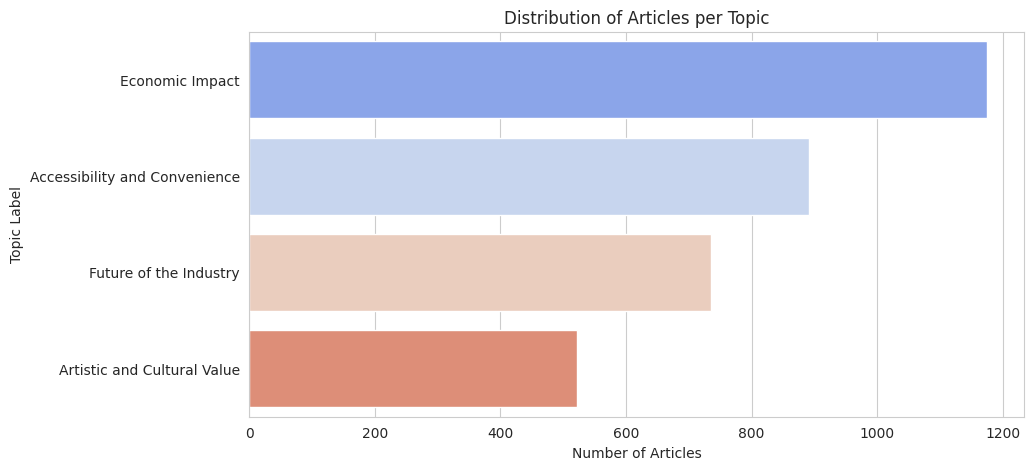

<ipython-input-33-f9e9bae1b809>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["view_label"], palette="pastel")


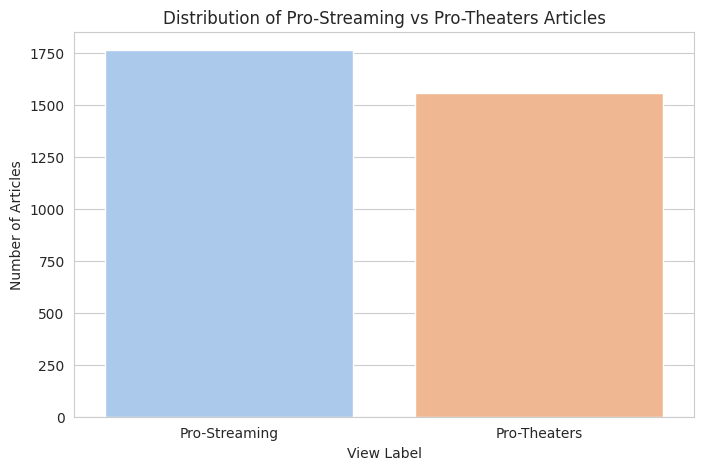

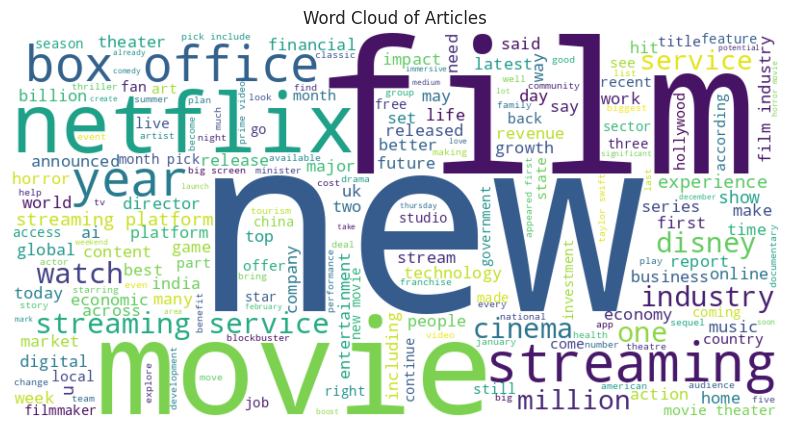

<ipython-input-33-f9e9bae1b809>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


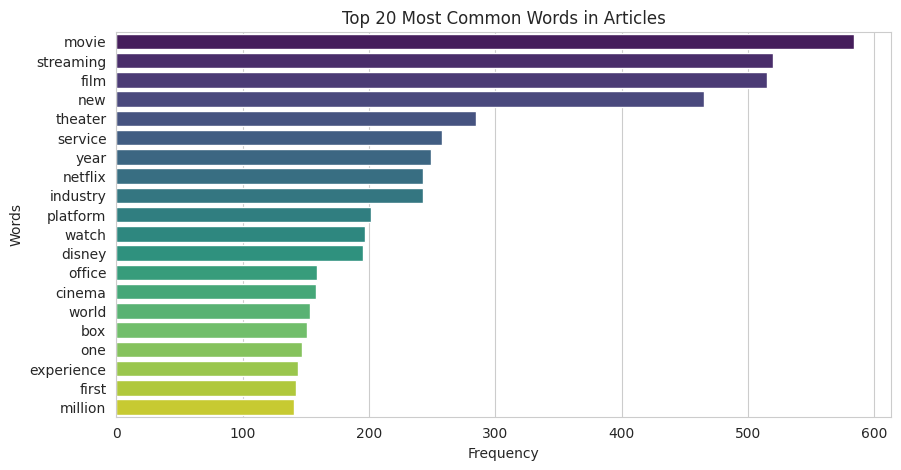

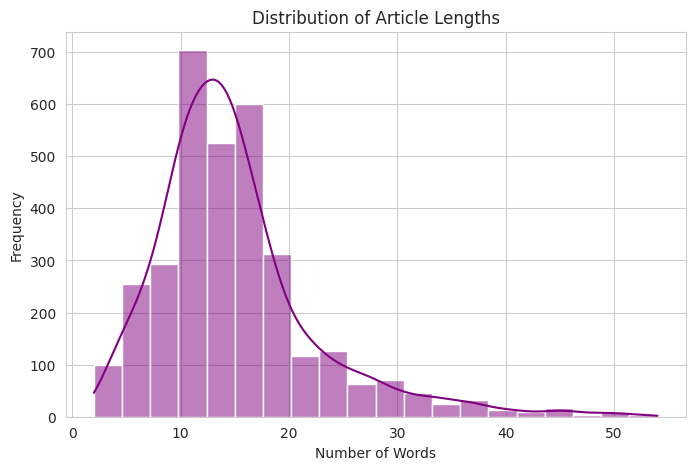

<ipython-input-33-f9e9bae1b809>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="topic_label", y="text_length", data=df, palette="Set3")


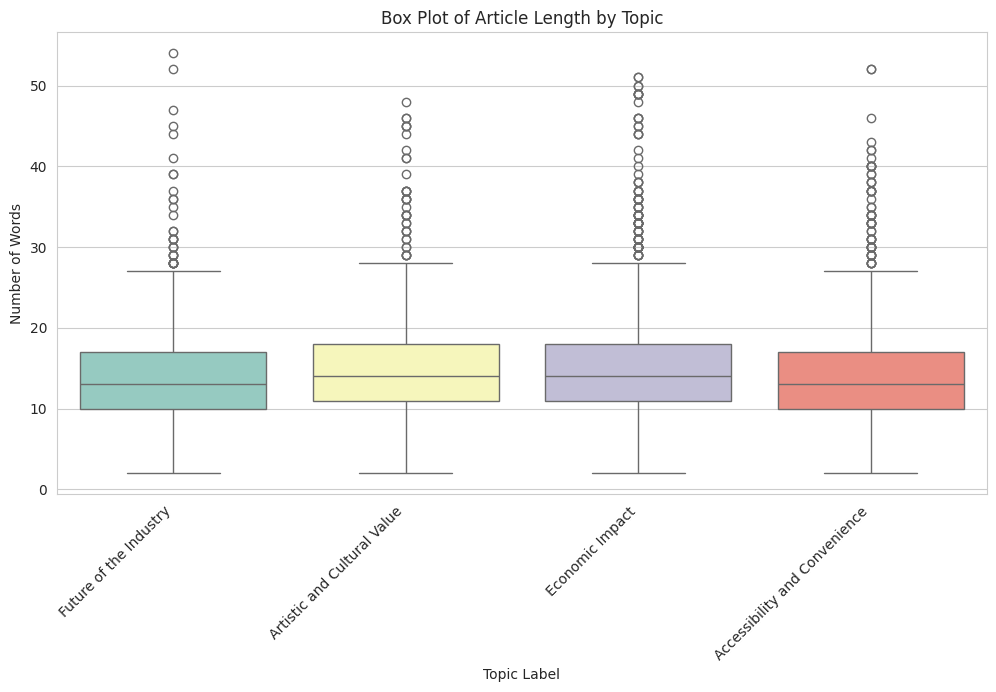

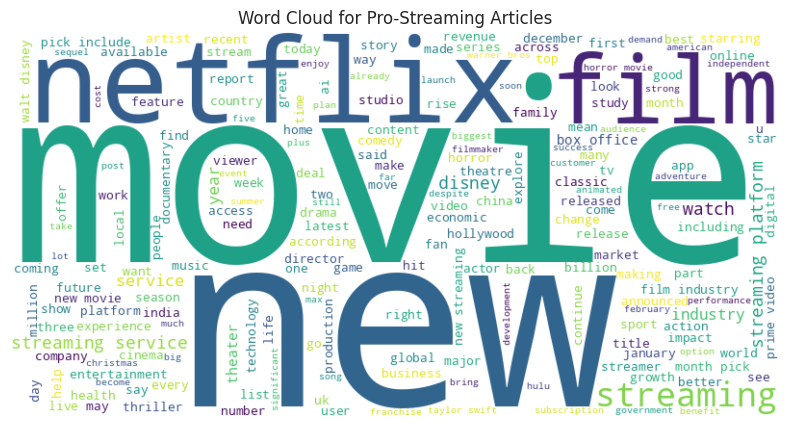

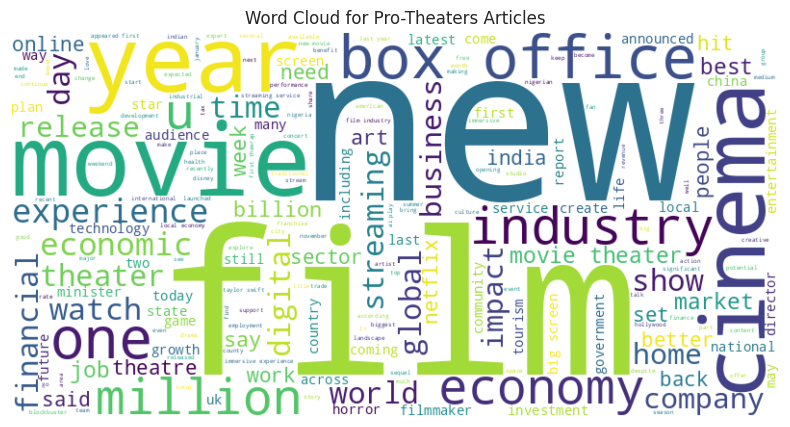

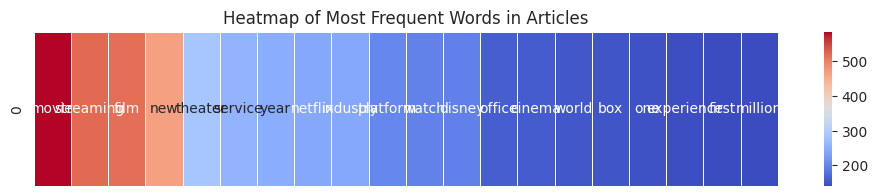

<ipython-input-33-f9e9bae1b809>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="view_label", y="text_length", data=df, palette="muted")


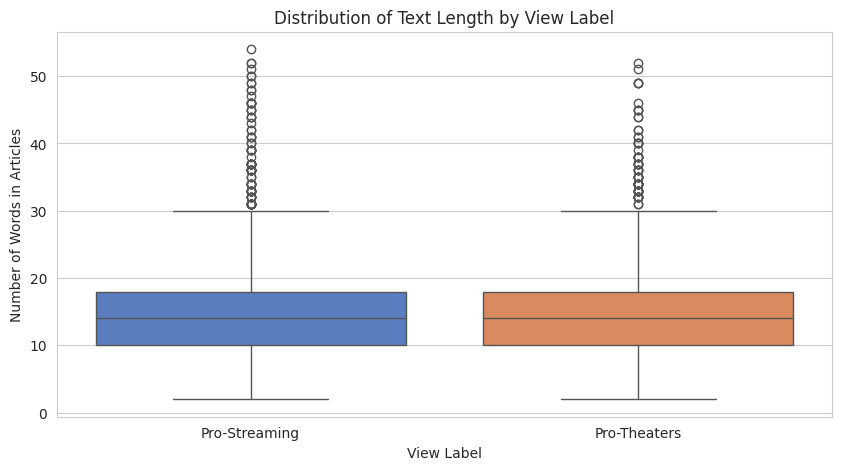

<ipython-input-33-f9e9bae1b809>:144: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["view_label"] == "Pro-Streaming"]["text_length"], label="Pro-Streaming", shade=True, color="blue")
<ipython-input-33-f9e9bae1b809>:145: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["view_label"] == "Pro-Theaters"]["text_length"], label="Pro-Theaters", shade=True, color="red")


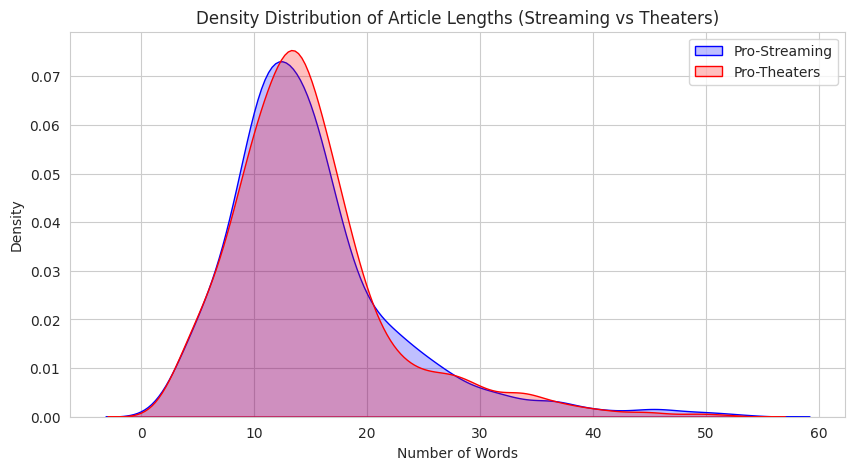

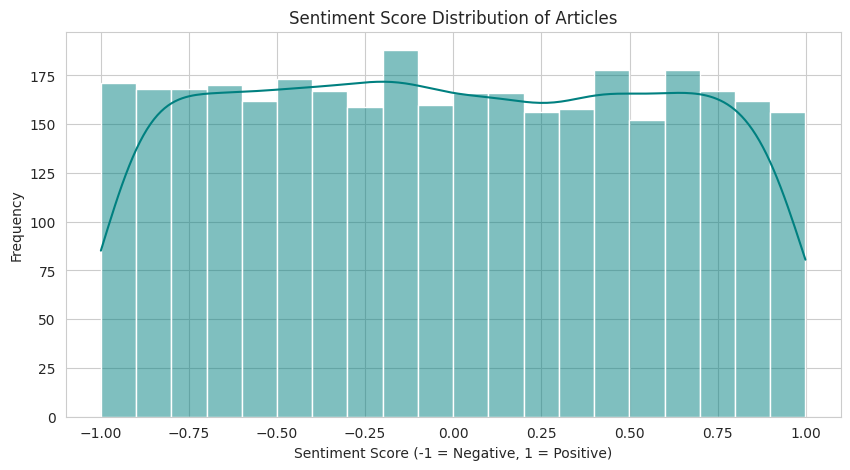

<Figure size 1200x600 with 0 Axes>

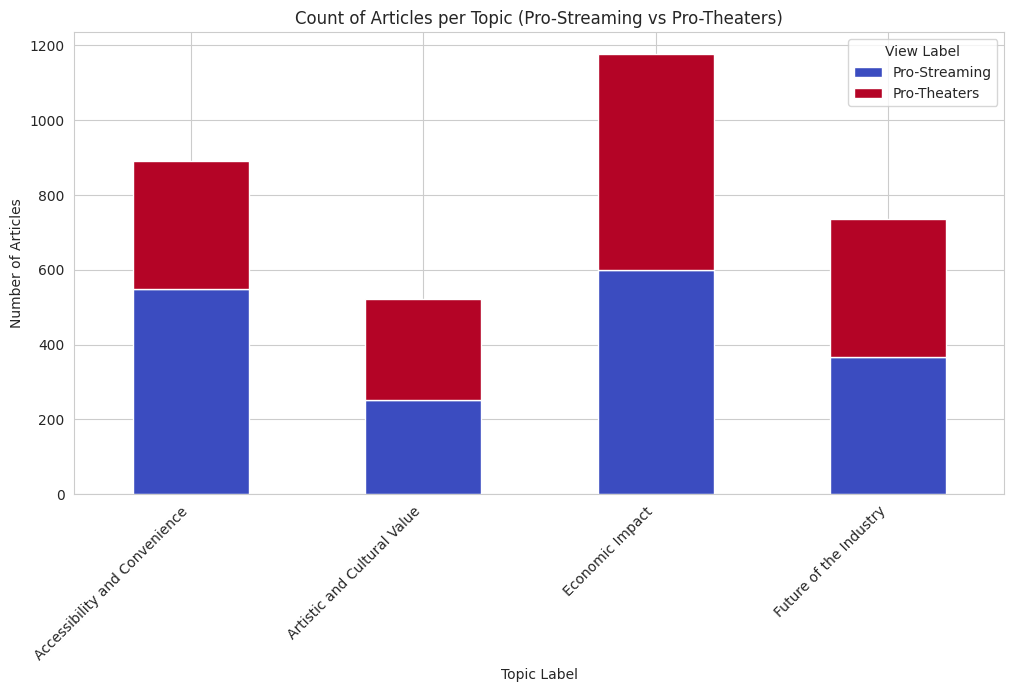

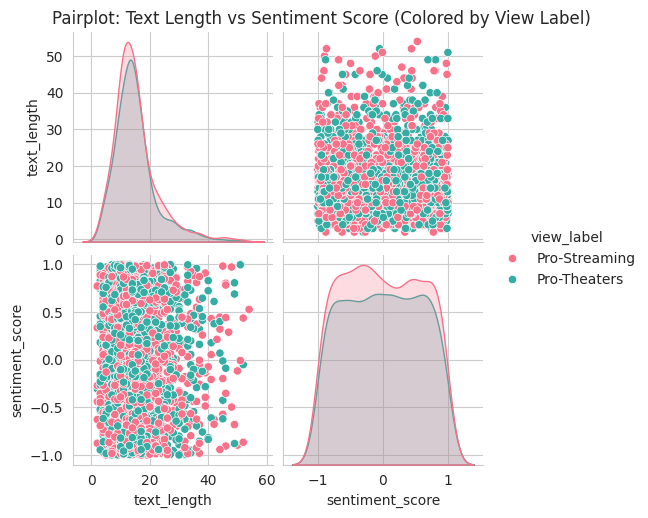

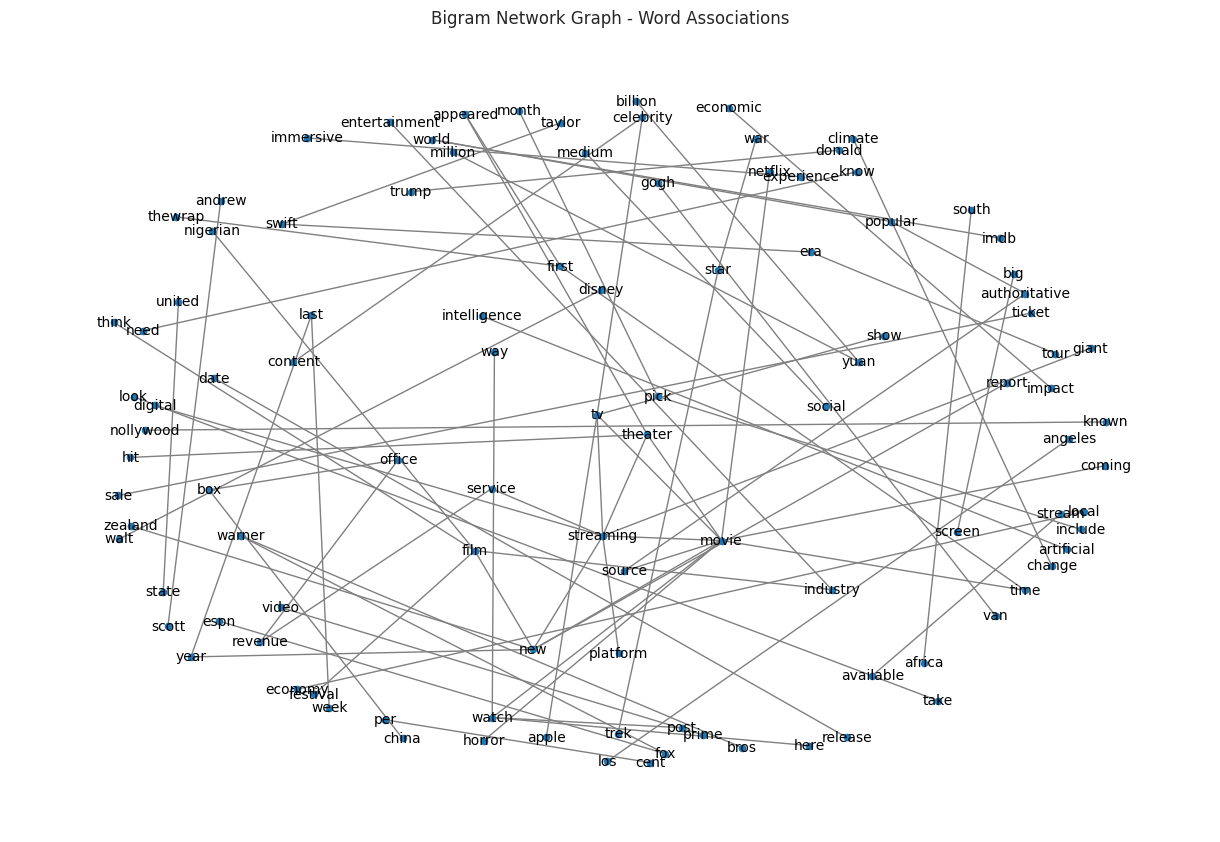

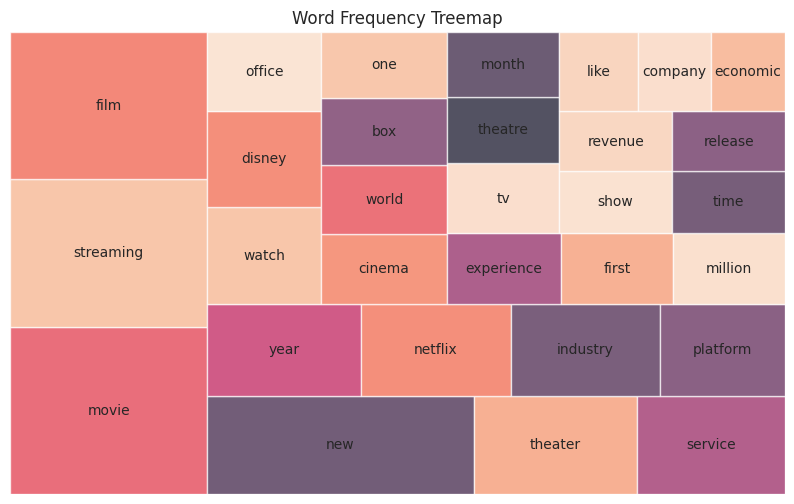

<ipython-input-33-f9e9bae1b809>:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="topic_label", y="text_length", data=df, palette="coolwarm")


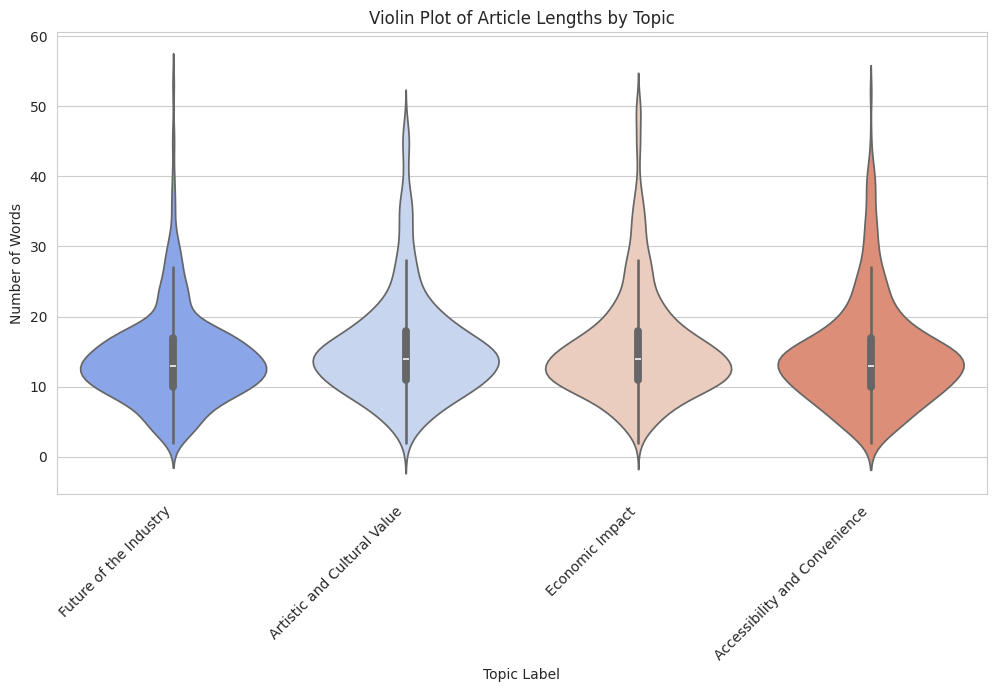

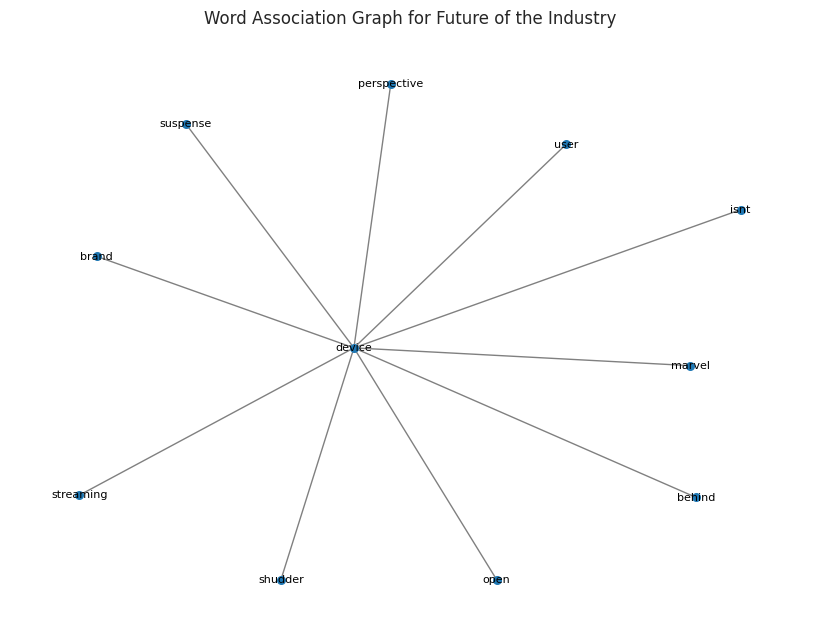

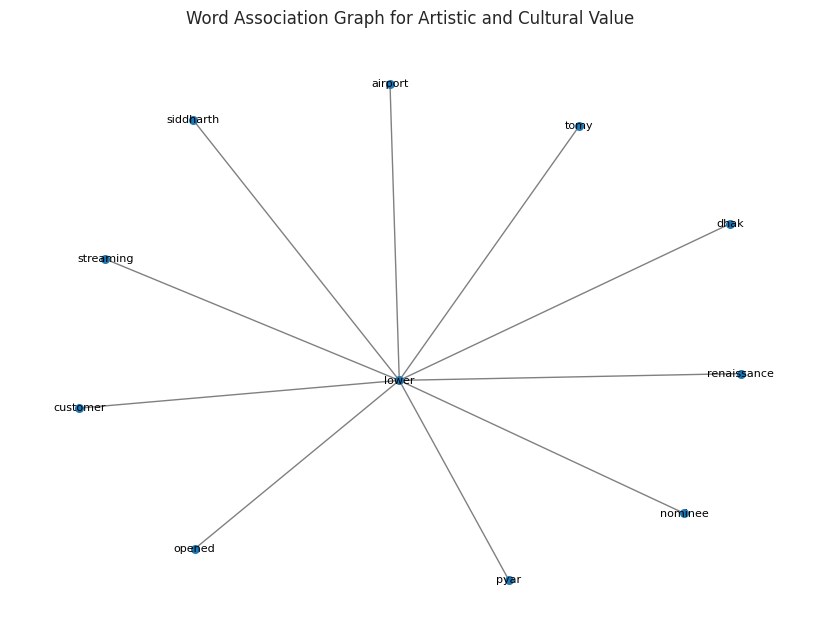

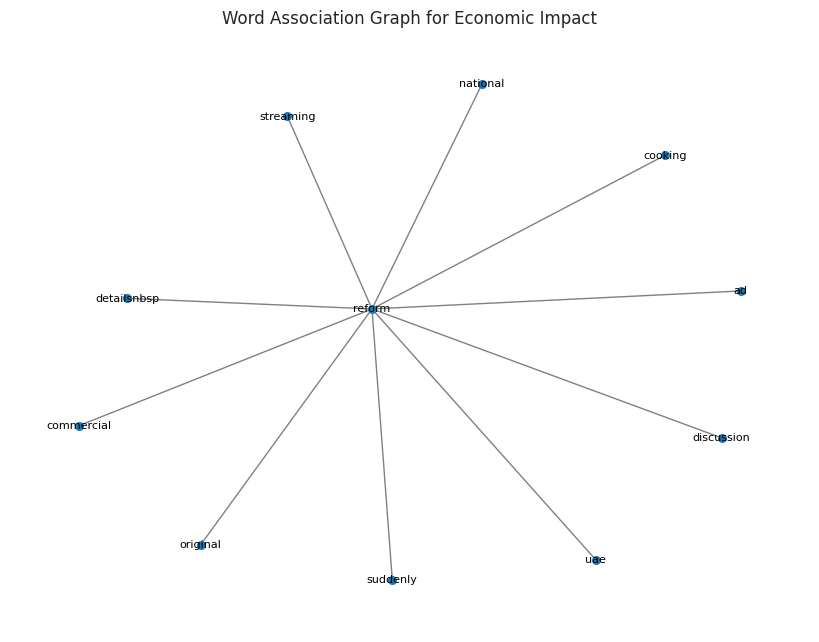

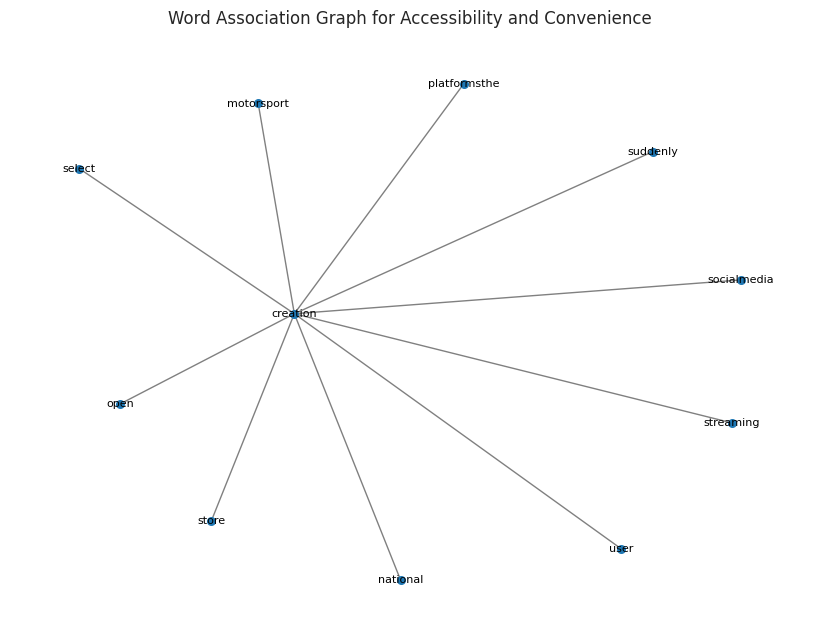

In [ ]:
visualization_paths = generate_visualizations(df_lemmatized)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to generate insightful visualizations from the vectorized data
def generate_vectorized_visualizations(df_vectorized, title_prefix):
    visualizations = []

    # 1. Distribution of Articles per Topic (After Vectorization)
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_vectorized["topic_label"], order=df_vectorized["topic_label"].value_counts().index, palette="coolwarm")
    plt.title(f"{title_prefix} - Distribution of Articles per Topic")
    plt.xlabel("Number of Articles")
    plt.ylabel("Topic Label")
    plt.show()

    # 2. Distribution of Articles per View Label (Streaming vs Theaters)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_vectorized["view_label"], palette="pastel")
    plt.title(f"{title_prefix} - Distribution of Pro-Streaming vs Pro-Theaters Articles")
    plt.xlabel("View Label")
    plt.ylabel("Number of Articles")
    plt.show()

    # 3. Top 20 Most Important Words (After Vectorization)
    word_importance = df_vectorized.drop(columns=["topic_label", "view_label"]).sum().sort_values(ascending=False).head(20)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=word_importance.values, y=word_importance.index, palette="viridis")
    plt.title(f"{title_prefix} - Top 20 Most Important Words (Vectorized)")
    plt.xlabel("Word Frequency / TF-IDF Score")
    plt.ylabel("Words")
    plt.show()

    # 4. Heatmap of Top 20 Words Across Topics
    top_words = word_importance.index
    word_matrix = df_vectorized.groupby("topic_label")[top_words].mean()

    plt.figure(figsize=(12, 6))
    sns.heatmap(word_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(f"{title_prefix} - Heatmap of Top Words Across Topics")
    plt.xlabel("Words")
    plt.ylabel("Topic Label")
    plt.xticks(rotation=45, ha="right")
    plt.show()






Generating CountVectorizer Visualizations...


<ipython-input-36-3927b46ad0fb>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




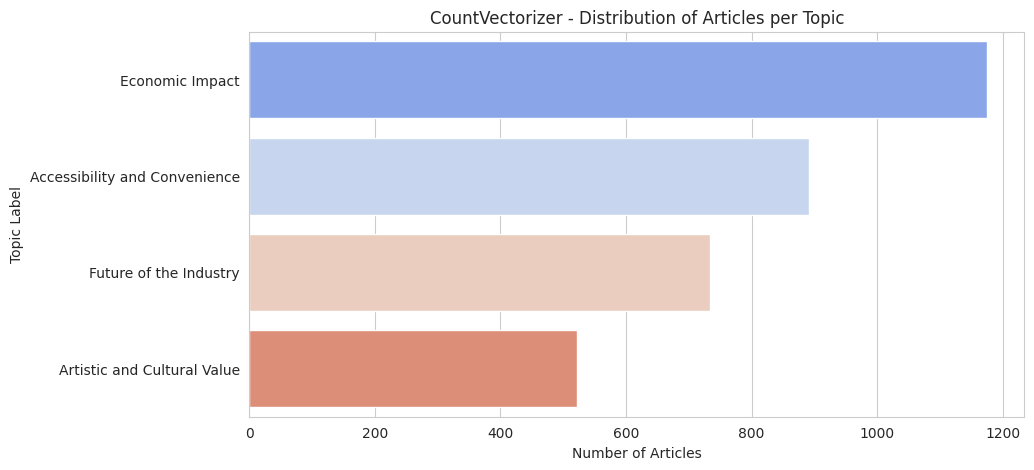

<ipython-input-36-3927b46ad0fb>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




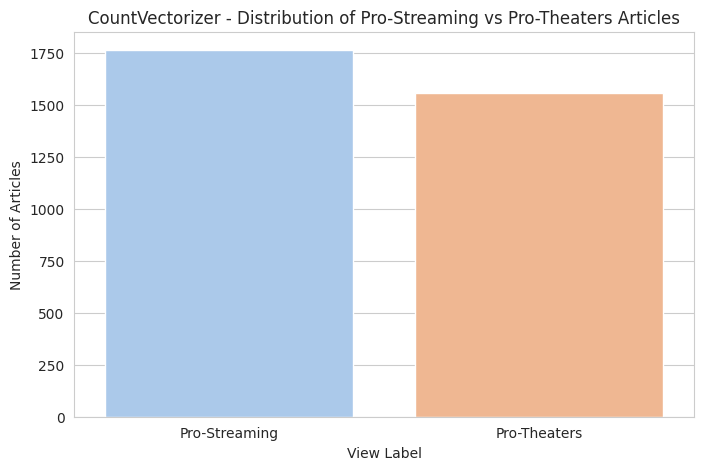

<ipython-input-36-3927b46ad0fb>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




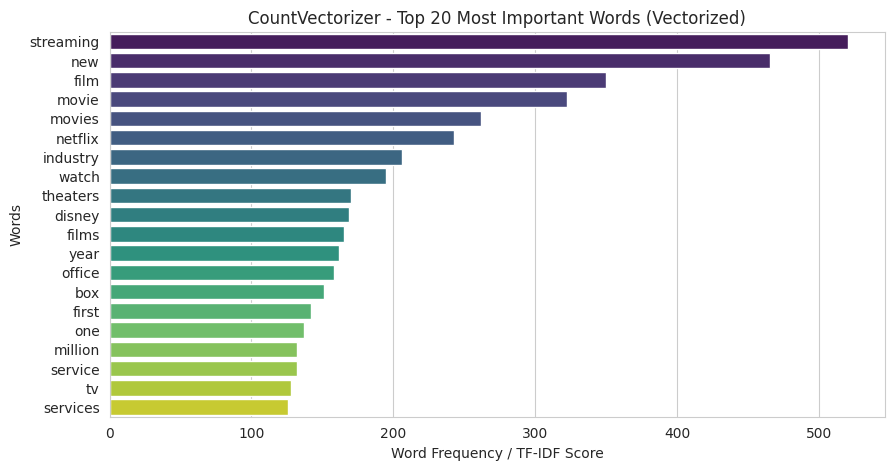

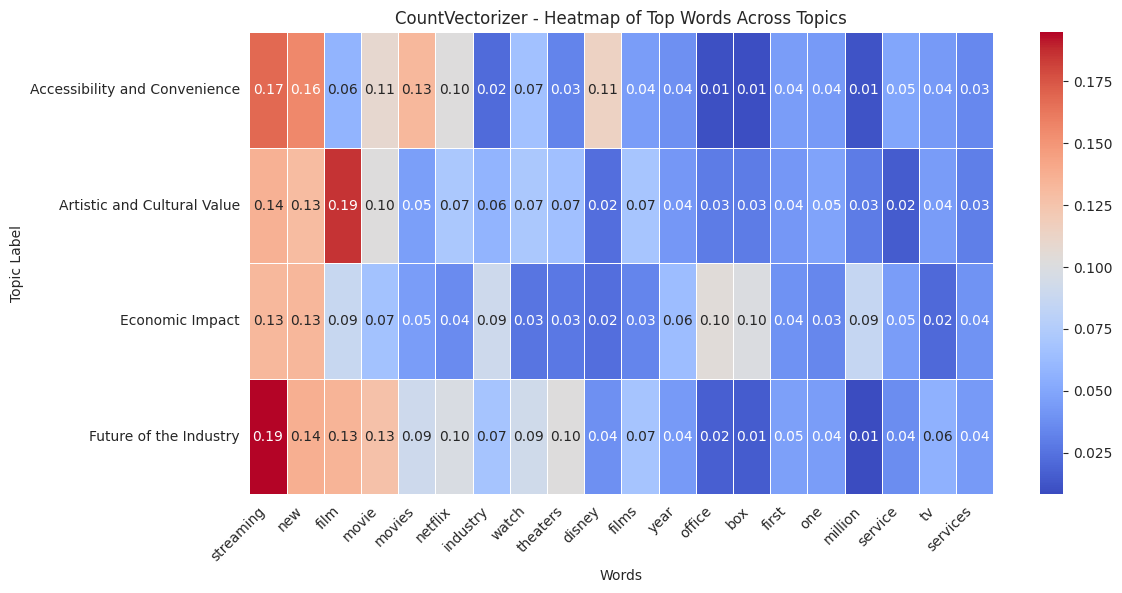

In [ ]:

# Generate visualizations for Count Vectorized Data
print("Generating CountVectorizer Visualizations...")
generate_vectorized_visualizations(df_count_vectorized, "CountVectorizer")



Generating TF-IDF Vectorizer Visualizations...


<ipython-input-36-3927b46ad0fb>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




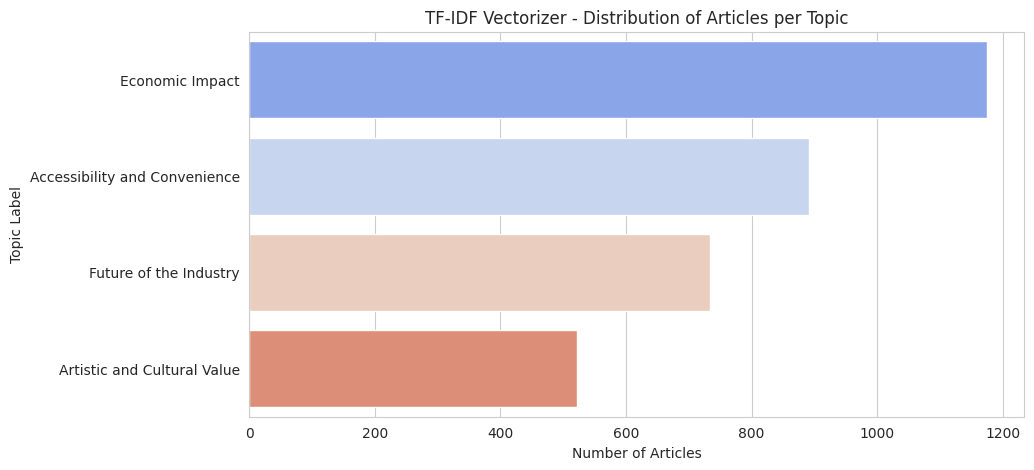

<ipython-input-36-3927b46ad0fb>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




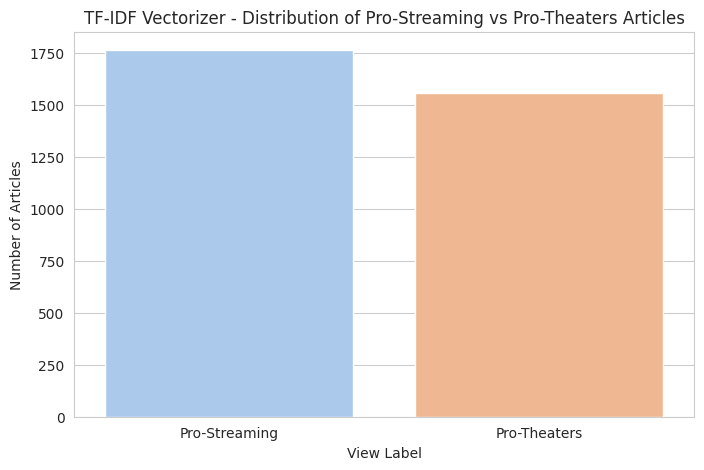

<ipython-input-36-3927b46ad0fb>:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




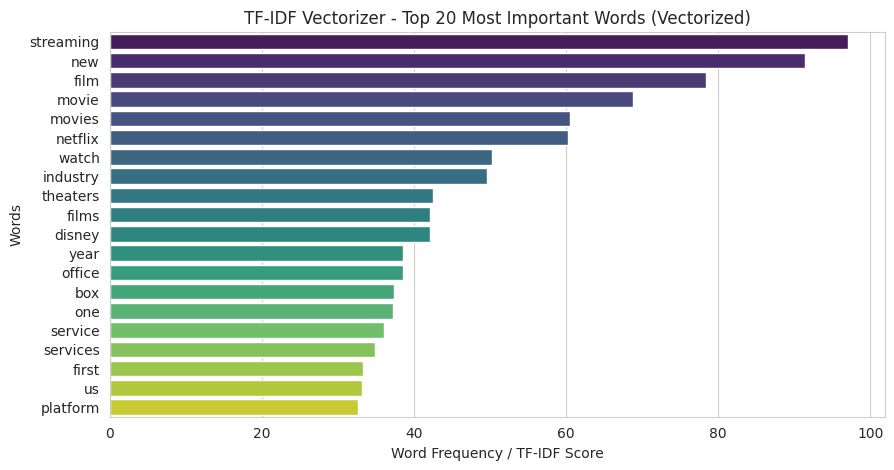

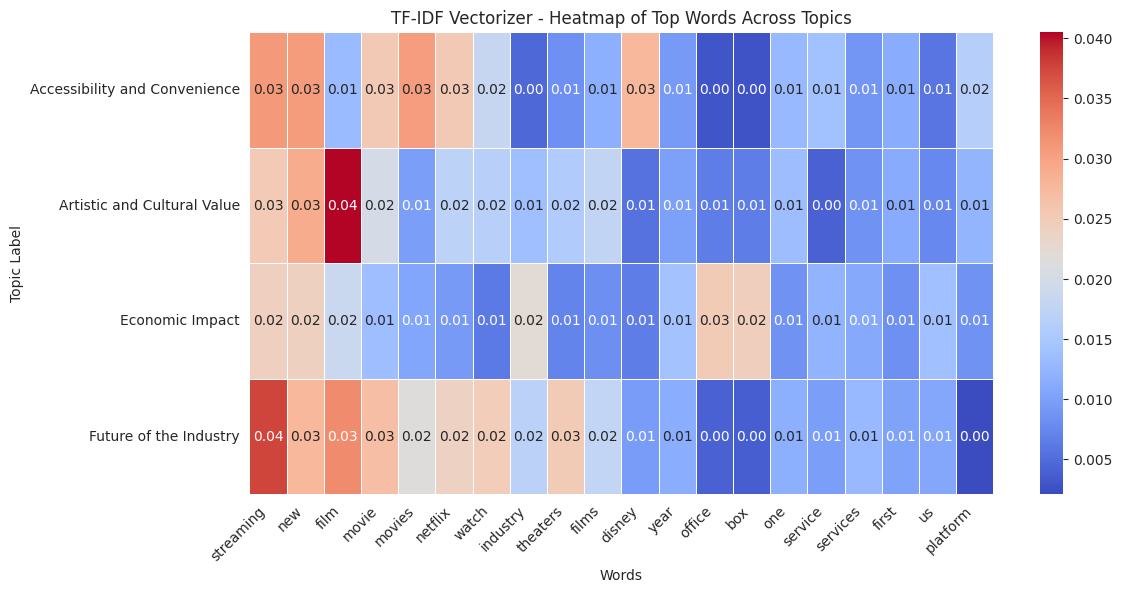

In [ ]:
# Generate visualizations for TF-IDF Vectorized Data
print("Generating TF-IDF Vectorizer Visualizations...")
generate_vectorized_visualizations(df_tfidf_vectorized, "TF-IDF Vectorizer")

## **CLUSTERING**

Considering the TF-IDF vectorized text data as it captures term importance information when compared to count vectorization.

In [ ]:
tfidf_vectorized_df = pd.read_csv("tfidf_vectorized_articles.csv")

In [ ]:
tfidf_vectorized_df.head()

topic_label     view_label  able  access  accessible  according  \
0  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
1  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
2  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
3  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
4  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   

   account  across  act  action  ...  would  writers  year  yearold  years  \
0      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
1      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
2      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
3      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
4      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   

   yet  young  youre  youtube  yuan  
0  0.0    0.0    0.0      0.0   0.0  
1  0.0    0.0    0.0      0.0   0.0  
2  0.0    0.0    0.0      0.0   0.0  
3  0.0    0.0    0.0      0.0   0.0  
4  0.0    0.0    0.0      0.0   0.0  

[5 rows x 1002 columns]

In [ ]:
tfidf_vectorized_df.shape

(3325, 1002)

In [ ]:
# Drop labels to get only numeric data for clustering as clustering is performed on non-labelled data
tfidf_features_df = tfidf_vectorized_df.drop(columns=["topic_label", "view_label"])

In [ ]:
tfidf_features_df

able  access  accessible  according  account  across  act  action  \
0      0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
1      0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
2      0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3      0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
4      0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
...    ...     ...         ...        ...      ...     ...  ...     ...   
3320   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3321   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3322   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3323   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3324   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers  year  yearold  years  yet  \
0            0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
1            0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
2            0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3            0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
4            0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
...          ...    ...  ...    ...      ...   ...      ...    ...  ...   
3320         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3321         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3322         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3323         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3324         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   

      young  youre  youtube  yuan  
0       0.0    0.0      0.0   0.0  
1       0.0    0.0      0.0   0.0  
2       0.0    0.0      0.0   0.0  
3       0.0    0.0      0.0   0.0  
4       0.0    0.0      0.0   0.0  
...     ...    ...      ...   ...  
3320    0.0    0.0      0.0   0.0  
3321    0.0    0.0      0.0   0.0  
3322    0.0    0.0      0.0   0.0  
3323    0.0    0.0      0.0   0.0  
3324    0.0    0.0      0.0   0.0  

[3325 rows x 1000 columns]

## **KMeans Clustering**

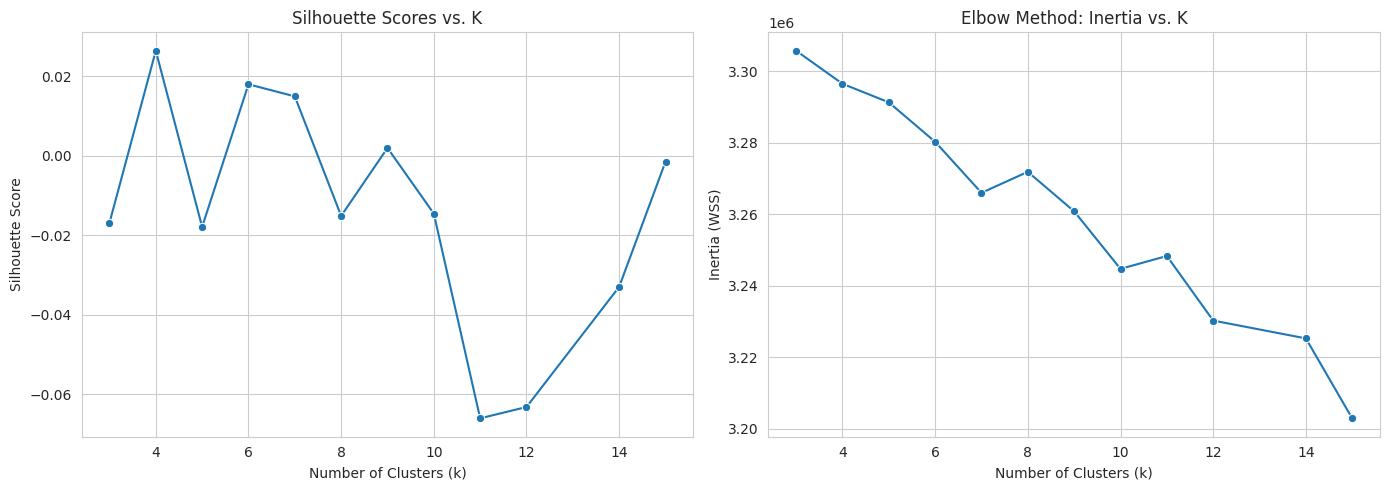

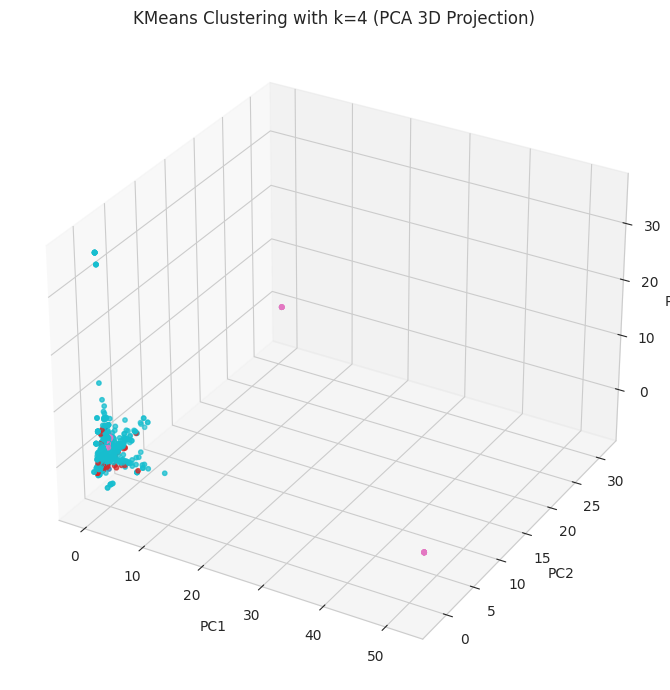

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the TF-IDF features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tfidf_features_df)

# PCA for visualization
pca = PCA(n_components=3)
tfidf_pca_3d = pca.fit_transform(scaled_data)

# Range of k values
k_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]

# Storage
silhouette_scores = []
inertias = []
cluster_results = {}

# Loop over k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, labels)
    inertia = kmeans.inertia_

    silhouette_scores.append(sil_score)
    inertias.append(inertia)
    cluster_results[k] = {
        "labels": labels,
        "silhouette_score": sil_score,
        "inertia": inertia,
    }

# Plot: Silhouette + Elbow side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Silhouette plot
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', ax=axs[0])
axs[0].set_title("Silhouette Scores vs. K")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Silhouette Score")
axs[0].grid(True)

# Elbow plot (Inertia)
sns.lineplot(x=k_values, y=inertias, marker='o', ax=axs[1])
axs[1].set_title("Elbow Method: Inertia vs. K")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Inertia (WSS)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Identify best k from silhouette
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_labels = cluster_results[best_k]["labels"]

# Visualize 3D PCA cluster with best k
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tfidf_pca_3d[:, 0], tfidf_pca_3d[:, 1], tfidf_pca_3d[:, 2],
                     c=best_labels, cmap='tab10', s=10)
ax.set_title(f"KMeans Clustering with k={best_k} (PCA 3D Projection)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()




In [ ]:
print(f"Best k by Silhouette Score: {best_k}")

Best k by Silhouette Score: 4


In [ ]:
silhouette_scores

[np.float64(-0.01689097790718987),
 np.float64(0.026407992146128528),
 np.float64(-0.017898041280759072),
 np.float64(0.01796032783578539),
 np.float64(0.01492377463955496),
 np.float64(-0.015143692259448035),
 np.float64(0.0019577234266424134),
 np.float64(-0.01455630871366841),
 np.float64(-0.06604101160345446),
 np.float64(-0.0631918722184087),
 np.float64(-0.03297747038916841),
 np.float64(-0.0014892424527896974)]

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=tfidf_features_df.columns)

In [ ]:
scaled_data_df

able    access  accessible  according   account    across       act  \
0    -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
1    -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
2    -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
3    -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
4    -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
...        ...       ...         ...        ...       ...       ...       ...   
3320 -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
3321 -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
3322 -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
3323 -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   
3324 -0.054343 -0.116421   -0.066055  -0.129623 -0.056839 -0.135028 -0.056661   

        action  activities     actor  ...     would   writers      year  \
0    -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
1    -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
2    -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
3    -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
4    -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
...        ...         ...       ...  ...       ...       ...       ...   
3320 -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
3321 -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
3322 -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
3323 -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   
3324 -0.119581   -0.054771 -0.079871  ... -0.102496 -0.054391 -0.204983   

       yearold     years       yet     young     youre   youtube      yuan  
0    -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
1    -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
2    -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
3    -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
4    -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
...        ...       ...       ...       ...       ...       ...       ...  
3320 -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
3321 -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
3322 -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
3323 -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  
3324 -0.055977 -0.150249 -0.068886 -0.060795 -0.072282 -0.066165 -0.070405  

[3325 rows x 1000 columns]

In [ ]:
# scaled_data_df.to_csv('scaled_tfidf_for_r.csv', index=False)

In [ ]:
# Required libraries
install.packages("coop")
install.packages("dendextend")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’





---------------------
Welcome to dendextend version 1.19.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




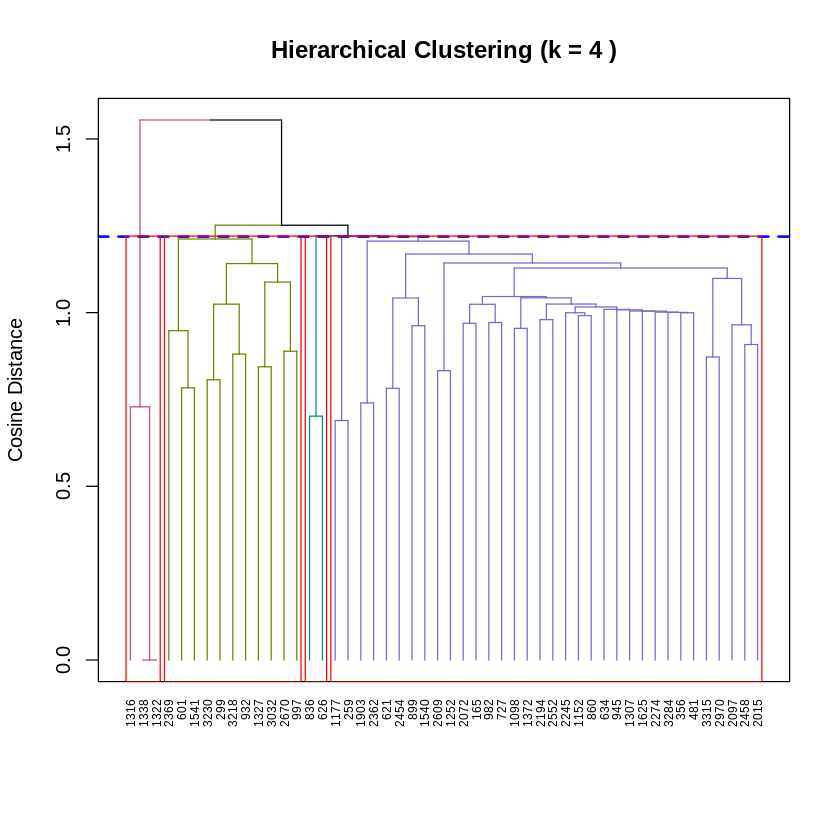

In [ ]:
library(coop)
library(dendextend)

# Load scaled TF-IDF data
data <- read.csv("scaled_tfidf_for_r.csv")

# Sample 50 articles
set.seed(42)
sample_indices <- sample(1:nrow(data), 50)
sample_data <- data[sample_indices, ]

# Cosine similarity and distance
cos_sim <- cosine(t(sample_data))
cos_dist <- as.dist(1 - cos_sim)

# Hierarchical clustering
hc <- hclust(cos_dist, method = "ward.D2")

# Convert to dendrogram and color branches
k <- 4
dend <- as.dendrogram(hc)
dend_colored <- color_branches(dend, k = k)

# Adjust margin slightly smaller (bottom margin was too large)
par(mar = c(6.5, 4, 4, 2) + 0.1)

# Plot the dendrogram without default x labels
plot(dend_colored,
     main = paste("Hierarchical Clustering (k =", k, ")"),
     ylab = "Cosine Distance",
     xlab = "",
     sub = "",
     axes = FALSE,
     leaflab = "none")

# Custom leaf labels closer to the plot
labels <- labels(dend_colored)
label_positions <- 1:length(labels)

# Adjust the label height closer to the plot bottom
text(x = label_positions,
     y = rep(par("usr")[3] - 0.05, length(labels)),  # reduced spacing
     labels = labels,
     srt = 90,
     adj = 1,
     xpd = TRUE,
     cex = 0.6)

# Add Y-axis and bounding box
axis(2)
box()

# Add cluster cut line and rectangles
cut_height <- hc$height[length(hc$height) - (k - 1)]
abline(h = cut_height, col = "blue", lty = 2, lwd = 2)
rect.hclust(hc, k = k, border = "red")

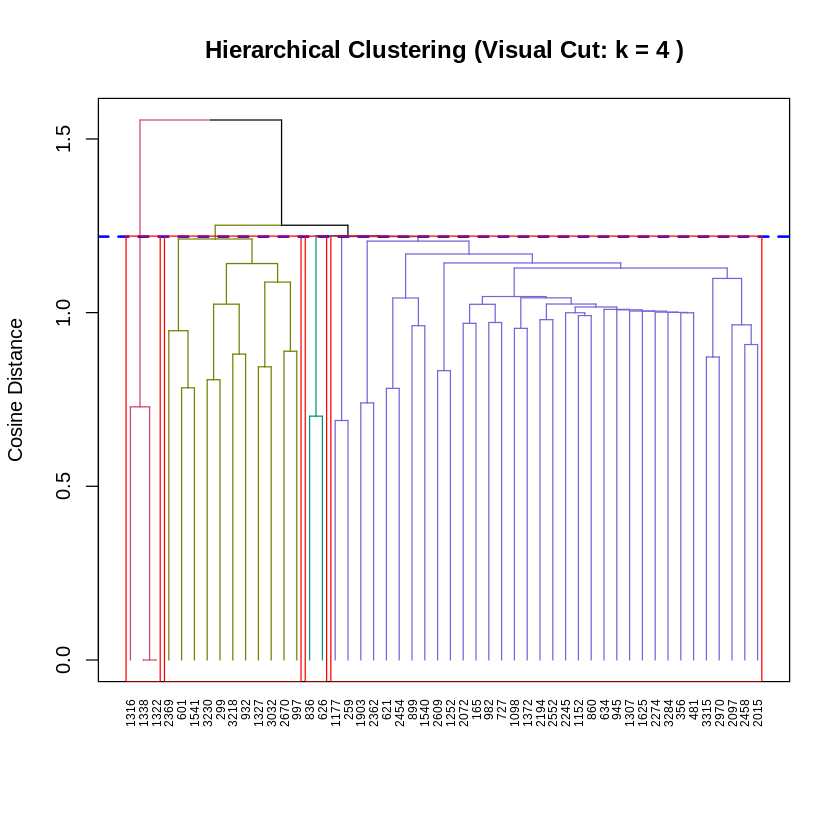

In [ ]:
library(coop)
library(dendextend)

# Load scaled TF-IDF data
data <- read.csv("scaled_tfidf_for_r.csv")

# Sample 50 articles for readability
set.seed(42)
sample_indices <- sample(1:nrow(data), 50)
sample_data <- data[sample_indices, ]

# Compute cosine distance from similarity
cos_sim <- cosine(t(sample_data))
cos_dist <- as.dist(1 - cos_sim)

# Hierarchical clustering using Ward’s method
hc <- hclust(cos_dist, method = "ward.D2")

# Convert to dendrogram and apply visual-based k
dend <- as.dendrogram(hc)


# There is a clear large vertical jump before 4 major branches merge
k <- 4
dend_colored <- color_branches(dend, k = k)

# Adjust margins for vertical labels
par(mar = c(6.5, 4, 4, 2) + 0.1)

# Plot dendrogram with no default labels
plot(dend_colored,
     main = paste("Hierarchical Clustering (Visual Cut: k =", k, ")"),
     ylab = "Cosine Distance",
     xlab = "",
     sub = "",
     axes = FALSE,
     leaflab = "none")

# Manually add leaf labels (vertical, better spaced)
labels <- labels(dend_colored)
label_positions <- 1:length(labels)

text(x = label_positions,
     y = rep(par("usr")[3] - 0.05, length(labels)),  # closer to plot
     labels = labels,
     srt = 90,
     adj = 1,
     xpd = TRUE,
     cex = 0.6)

# Add y-axis and border
axis(2)
box()

# Add a cut line based on visual gap height in dendrogram
cut_height <- hc$height[length(hc$height) - (k - 1)]  # height where k clusters form
abline(h = cut_height, col = "blue", lty = 2, lwd = 2)

# Draw rectangles around visually inferred clusters
rect.hclust(hc, k = k, border = "red")


We selected k = 4 based on a visual inspection of the hierarchical clustering dendrogram. By identifying the largest vertical distance between merges (a significant jump in cosine distance), we drew a horizontal cut through the dendrogram. This cut revealed four distinct branches before major merges occurred, indicating the presence of four meaningful clusters

##**ARM**

In [ ]:
lemmatized_df = pd.read_csv('lemmatized_articles.csv')

In [ ]:
with open('lemmatized_transactions.txt', "w") as f:
    for row in lemmatized_df['lemmatized_text']:
        items = sorted(set(str(row).split()))
        f.write(",".join(items) + "\n")

In [ ]:
# Install necessary packages
install.packages("arules")
install.packages("arulesViz")

library(arules)
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘RcppArmadillo’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
# Load the transaction data (lemmatized_transactions.txt)
transactions <- read.transactions("lemmatized_transactions.txt", format = "basket", sep = ",")

# View summary
summary(transactions)

# Apply Apriori algorithm with selected thresholds
rules <- apriori(transactions,
                 parameter = list(supp = 0.01, conf = 0.5, minlen = 2))

# Top 15 rules by support
top_support <- head(sort(rules, by = "support", decreasing = TRUE), 15)
inspect(top_support)

# Top 15 rules by confidence
top_conf <- head(sort(rules, by = "confidence", decreasing = TRUE), 15)
inspect(top_conf)

# Top 15 rules by lift
top_lift <- head(sort(rules, by = "lift", decreasing = TRUE), 15)
inspect(top_lift)



transactions as itemMatrix in sparse format with
 3325 rows (elements/itemsets/transactions) and
 10089 columns (items) and a density of 0.001423243 

most frequent items:
    movie streaming      film       new   theater   (Other) 
      527       477       448       421       251     45620 

element (itemset/transaction) length distribution:
sizes
  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21 
  8  27  66  67  79 115 118 197 231 276 253 287 248 232 199 184 114  75  74  82 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
 39  42  59  33  31  23  24  25  16  12   9  13  15   7  13   7   1   3   5   4 
 42  43  44  45  46  49 
  1   3   1   3   3   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   10.00   13.00   14.36   17.00   49.00 

includes extended item information - examples:
         labels
1           aaa
2 aadujeevitham
3      aavesham

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 33 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10089 item(s), 3325 transaction(s)] done [0.03s].
sorting and recoding items ... [208 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [26 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                 rhs          support    confidence coverage  
[1]  {service}        => {streaming}  0.04270677 0.5941423  0.07187970
[2]  {box}            => {office}     0.04180451 0.9720280  0.04300752
[3]  {office}         => {box}        0.04180451 0.9205298  0.04541353
[4

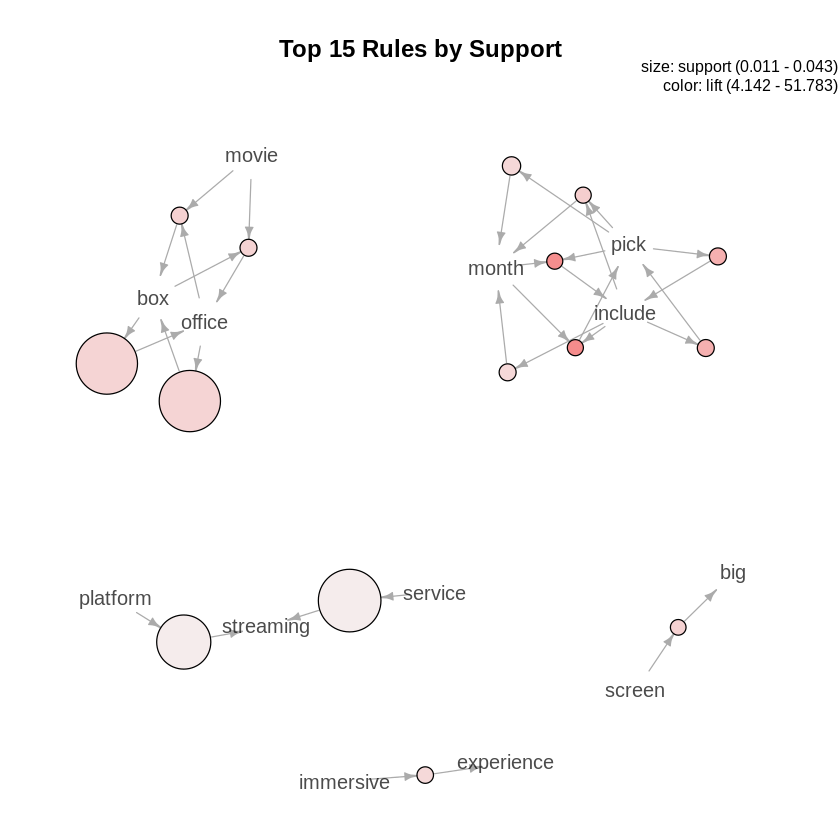

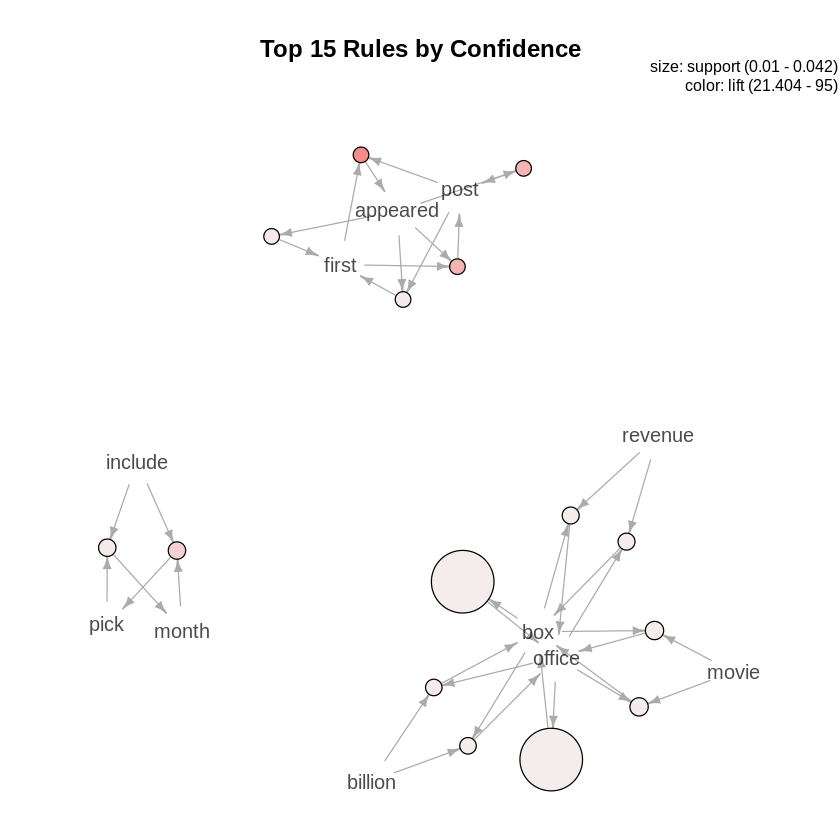

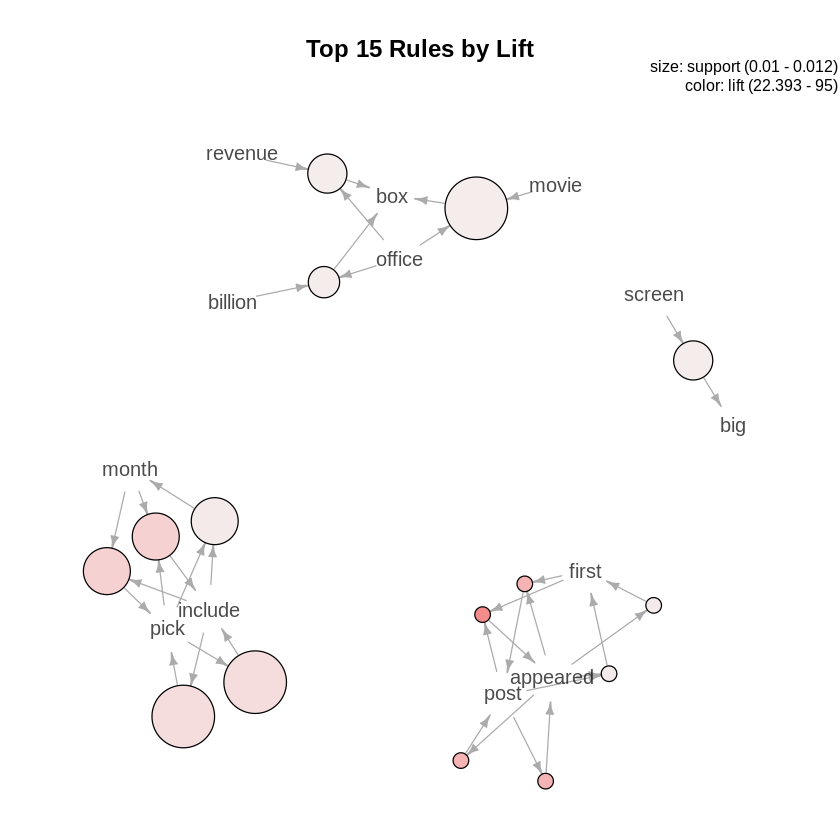

In [ ]:
# Plot static network graphs (visible in console or saved to file)
plot(top_support, method = "graph", engine = "igraph", main = "Top 15 Rules by Support")
plot(top_conf, method = "graph", engine = "igraph", main = "Top 15 Rules by Confidence")
plot(top_lift, method = "graph", engine = "igraph", main = "Top 15 Rules by Lift")


## **LDA**

In [ ]:
!pip install pyLDAvis

  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


Topic 1: film, office, box, disney, movie, streaming, year, billion, films, industry
Topic 2: economic, financial, theatre, impact, ai, market, service, revenue, million, global
Topic 3: industry, new, people, economy, jobs, need, film, better, local, art
Topic 4: streaming, netflix, movies, new, watch, movie, tv, film, content, best
Topic 5: new, theaters, movie, streaming, months, include, immersive, picks, experience, theater


<ipython-input-3-897a2f065437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette='coolwarm')


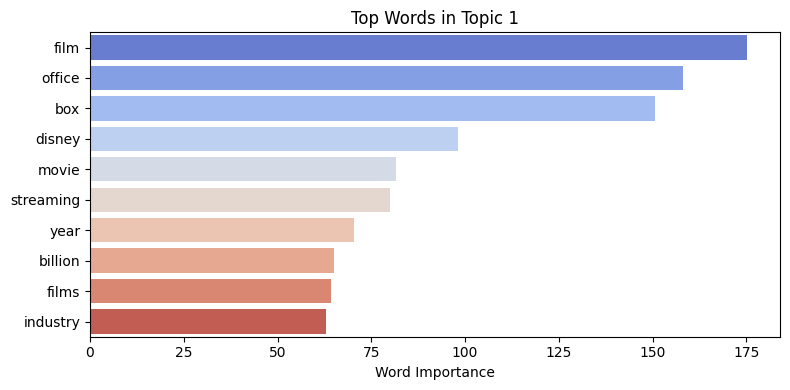

<ipython-input-3-897a2f065437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette='coolwarm')


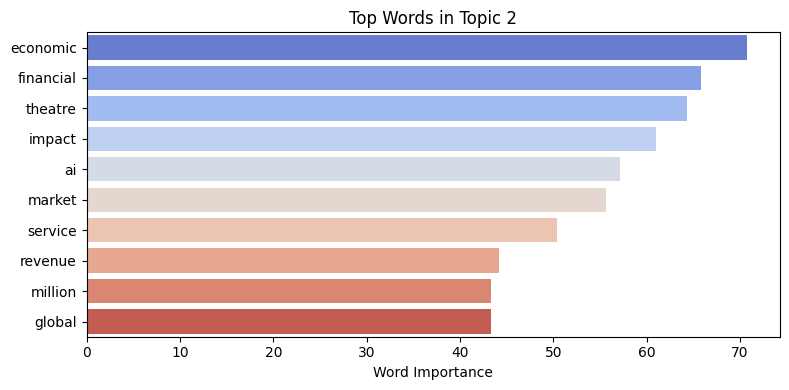

<ipython-input-3-897a2f065437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette='coolwarm')


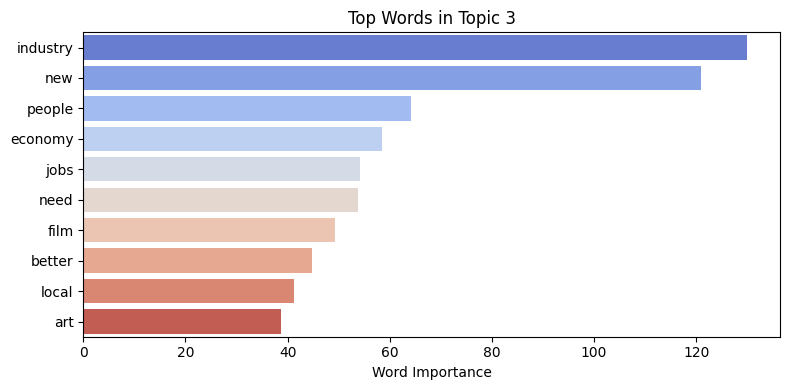

<ipython-input-3-897a2f065437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette='coolwarm')


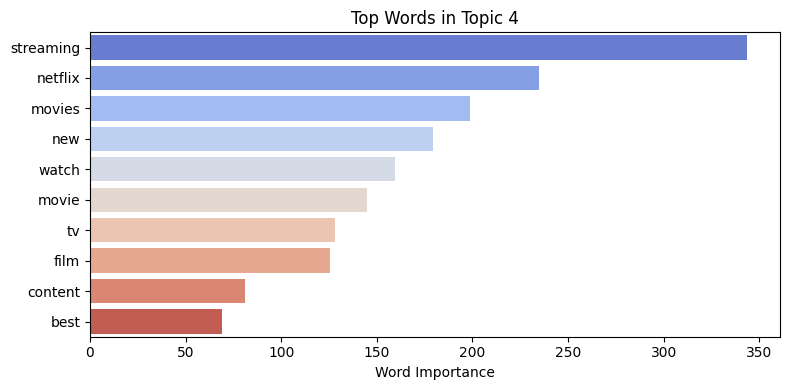

<ipython-input-3-897a2f065437>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weights, y=top_words, palette='coolwarm')


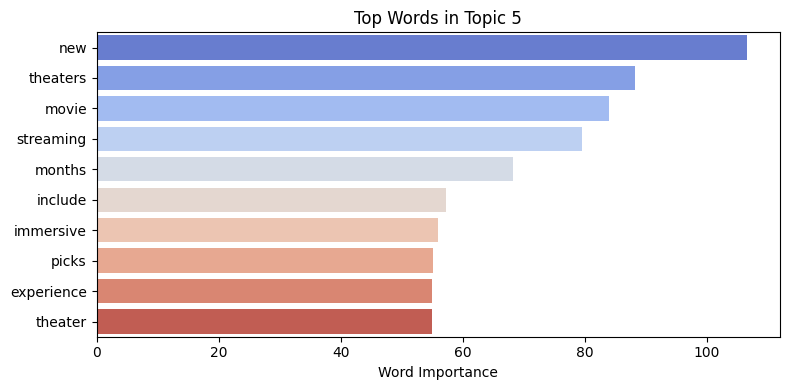

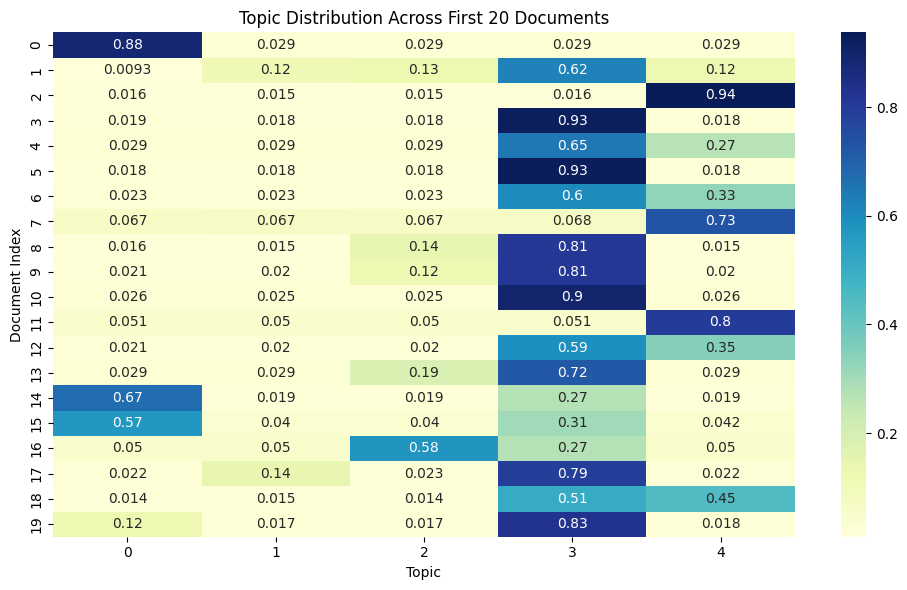

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Load count vectorized data
df = pd.read_csv("count_vectorized_articles.csv")
X = df.drop(columns=["topic_label", "view_label"], errors='ignore')

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
feature_names = X.columns
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

display_topics(lda, feature_names)

# --- VISUALIZATION 1: Bar Plots of Top Words per Topic ---
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_weights = topic[top_indices]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_weights, y=top_words, palette='coolwarm')
    plt.title(f"Top Words in Topic {topic_idx + 1}")
    plt.xlabel("Word Importance")
    plt.tight_layout()
    plt.show()

# --- VISUALIZATION 2: Document-topic heatmap ---
topic_distributions = lda.transform(X)

plt.figure(figsize=(10, 6))
sns.heatmap(topic_distributions[:20], cmap="YlGnBu", annot=True)
plt.title("Topic Distribution Across First 20 Documents")
plt.xlabel("Topic")
plt.ylabel("Document Index")
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall pyLDAvis

Found existing installation: pyLDAvis 3.4.1
Uninstalling pyLDAvis-3.4.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pyLDAvis-3.4.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pyLDAvis/*
Proceed (Y/n)? Y
  Successfully uninstalled pyLDAvis-3.4.1


In [ ]:
!pip install pyLDAvis

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)


In [ ]:
# ==== FULL FINAL CODE ====

import os
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
from pyLDAvis import prepare
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Fix joblib multiprocessing issue ====
os.environ["JOBLIB_MULTIPROCESSING"] = "0"

# ==== Step 1: Load your count vectorized data ====
df = pd.read_csv("count_vectorized_articles.csv")
X = df.drop(columns=["topic_label", "view_label"], errors="ignore")
vocab = X.columns

# ==== Step 2: Convert X to numpy early to avoid pickling issues ====
X_numpy = X.to_numpy()

# ==== Step 3: Fit LDA with n_jobs=1 ====
lda = LatentDirichletAllocation(
    n_components=5,
    max_iter=10,
    random_state=42,
    learning_method='batch',
    n_jobs=1
)
lda.fit(X_numpy)

# ==== Step 4: Prepare PyLDAvis inputs ====
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
doc_topic_dists = lda.transform(X_numpy)
doc_topic_dists = doc_topic_dists / doc_topic_dists.sum(axis=1)[:, np.newaxis]
doc_lengths = X_numpy.sum(axis=1)
term_frequency = X_numpy.sum(axis=0)

data = {
    "topic_term_dists": topic_term_dists,
    "doc_topic_dists": doc_topic_dists,
    "doc_lengths": doc_lengths,
    "vocab": vocab,
    "term_frequency": term_frequency
}

# ==== Step 5: Visualize ====
pyLDAvis.enable_notebook()
vis_data = prepare(**data)
pyLDAvis.save_html(vis_data, "lda_byom_visualization.html")
vis_data  # View in notebook or Colab


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.140645  0.087122       1        1  26.260324
2     -0.133631  0.072488       2        1  20.270032
0      0.045684  0.120554       3        1  19.348153
4      0.151397 -0.183560       4        1  17.628437
1     -0.204096 -0.096603       5        1  16.493054, topic_info=          Term        Freq       Total Category  logprob  loglift
573    netflix  234.000000  234.000000  Default  30.0000  30.0000
594     office  154.000000  154.000000  Default  29.0000  29.0000
104        box  147.000000  147.000000  Default  28.0000  28.0000
832  streaming  501.000000  501.000000  Default  27.0000  27.0000
317       film  338.000000  338.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
95     billion   27.637450   95.316119   Topic5  -5.1077   0.5642
172    company   25.089672   62.197201   Topic5  -5.2044   0.8944
764   services   25.879420  122.580647   Topic5  -5.1734   0.2469
327      first   24.038281  138.152566   Topic5  -5.2472   0.0535
3    according   22.942059   58.194239   Topic5  -5.2939   0.8714

[335 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.391271     access
1         2  0.142280     access
1         5  0.462411     access
3         2  0.360860  according
3         3  0.240574  according
...     ...       ...        ...
992       4  0.031737       year
992       5  0.126949       year
993       3  0.945595    yearold
995       4  0.982639        yet
999       3  0.979856       yuan

[545 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 5, 2])

In [ ]:
X

able  access  accessible  according  account  across  act  action  \
0        0       0           0          0        0       0    0       0   
1        0       0           0          0        0       0    0       0   
2        0       0           0          0        0       0    0       0   
3        0       0           0          0        0       0    0       0   
4        0       0           0          0        0       0    0       0   
...    ...     ...         ...        ...      ...     ...  ...     ...   
3320     0       0           0          0        0       0    0       0   
3321     0       0           0          0        0       0    0       0   
3322     0       0           0          0        0       0    0       0   
3323     0       0           0          0        0       0    0       0   
3324     0       0           0          0        0       0    0       0   

      activities  actor  ...  would  writers  year  yearold  years  yet  \
0              0      0  ...      0        0     0        0      0    0   
1              0      0  ...      0        0     0        0      0    0   
2              0      0  ...      0        0     0        0      0    0   
3              0      0  ...      0        0     0        0      0    0   
4              0      0  ...      0        0     0        0      0    0   
...          ...    ...  ...    ...      ...   ...      ...    ...  ...   
3320           0      0  ...      0        0     0        0      0    0   
3321           0      0  ...      0        0     0        0      0    0   
3322           0      0  ...      0        0     0        0      0    0   
3323           0      0  ...      0        0     0        0      0    0   
3324           0      0  ...      0        0     0        0      0    0   

      young  youre  youtube  yuan  
0         0      0        0     0  
1         0      0        0     0  
2         0      0        0     0  
3         0      0        0     0  
4         0      0        0     0  
...     ...    ...      ...   ...  
3320      0      0        0     0  
3321      0      0        0     0  
3322      0      0        0     0  
3323      0      0        0     0  
3324      0      0        0     0  

[3325 rows x 1000 columns]

## **Naive Bayes**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df_nb = pd.read_csv('tfidf_vectorized_articles.csv')

In [5]:
df_nb.head()

topic_label     view_label  able  access  accessible  according  \
0  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
1  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
2  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
3  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   
4  Future of the Industry  Pro-Streaming   0.0     0.0         0.0        0.0   

   account  across  act  action  ...  would  writers  year  yearold  years  \
0      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
1      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
2      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
3      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   
4      0.0     0.0  0.0     0.0  ...    0.0      0.0   0.0      0.0    0.0   

   yet  young  youre  youtube  yuan  
0  0.0    0.0    0.0      0.0   0.0  
1  0.0    0.0    0.0      0.0   0.0  
2  0.0    0.0    0.0      0.0   0.0  
3  0.0    0.0    0.0      0.0   0.0  
4  0.0    0.0    0.0      0.0   0.0  

[5 rows x 1002 columns]

In [18]:
# Step-by-step logic for Naïve Bayes classification using the provided TF-IDF dataset


# Step 2: Drop rows with missing labels (view_label is our target)
df_clean_nb = df_nb.dropna(subset=["view_label"])

# Step 3: Separate features and labels
X = df_clean_nb.drop(columns=["topic_label", "view_label"])
y = df_clean_nb["view_label"]

# Step 4: Encode the string labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded_df = pd.DataFrame({'view_label_encoded': y_encoded})

# Step 5: Split the data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded_df, test_size=0.25, random_state=42, stratify=y_encoded
)

# Step 6: Train a Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = nb_model.predict(X_test)

# Step 8: Evaluate the model
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print(classification_rep)

               precision    recall  f1-score   support

Pro-Streaming       0.65      0.76      0.70       441
 Pro-Theaters       0.67      0.55      0.60       390

     accuracy                           0.66       831
    macro avg       0.66      0.65      0.65       831
 weighted avg       0.66      0.66      0.65       831



In [16]:
conf_matrix

array([[334, 107],
       [177, 213]])

In [17]:
print(accuracy)

0.6582430806257521


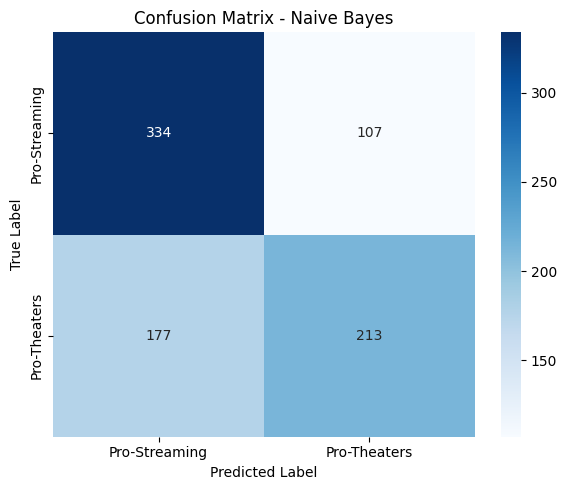

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [10]:
X_train.head()

able  access  accessible  according  account  across  act  action  \
3098   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
209    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
398    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
2387   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
1097   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers      year  yearold  years  yet  \
3098         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
209          0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
398          0.0    0.0  ...    0.0      0.0  0.178704      0.0    0.0  0.0   
2387         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
1097         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3098    0.0    0.0      0.0   0.0  
209     0.0    0.0      0.0   0.0  
398     0.0    0.0      0.0   0.0  
2387    0.0    0.0      0.0   0.0  
1097    0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [11]:
X_test.head()

able  access  accessible  according  account  across  act  action  \
3111   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3244   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3056   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3100   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
435    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers  year  yearold  years  yet  \
3111         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3244         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3056         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3100         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
435          0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3111    0.0    0.0      0.0   0.0  
3244    0.0    0.0      0.0   0.0  
3056    0.0    0.0      0.0   0.0  
3100    0.0    0.0      0.0   0.0  
435     0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [12]:
y_train.head()

view_label_encoded
3098                   1
209                    0
398                    1
2387                   0
1097                   0

In [13]:
y_test.head()

view_label_encoded
3111                   0
3243                   0
3056                   1
3100                   0
435                    1

## **Decision Tree**

In [4]:
# Re-load the latest uploaded dataset
file_path = "tfidf_vectorized_articles.csv"
df_dt = pd.read_csv(file_path)

# Drop rows with missing labels
df_clean_dt = df_dt.dropna(subset=["view_label"])

# Separate features and target
X = df_clean_dt.drop(columns=["topic_label", "view_label"])
y = df_clean_dt["view_label"]

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded_df = pd.DataFrame({'view_label_encoded': y_encoded})

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded_df, test_size=0.25, random_state=42, stratify=y_encoded
)

# Train Decision Tree models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create three decision trees with different depths or splitting criteria
dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt_full = DecisionTreeClassifier(criterion="gini", random_state=42)  # Full tree

# Fit models
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)
dt_full.fit(X_train, y_train)

# Predict using the full-depth tree for evaluation
y_pred = dt_full.predict(X_test)

# Evaluation
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)




In [5]:
print(classification_rep)

               precision    recall  f1-score   support

Pro-Streaming       0.67      0.76      0.71       441
 Pro-Theaters       0.68      0.57      0.62       390

     accuracy                           0.67       831
    macro avg       0.68      0.67      0.67       831
 weighted avg       0.67      0.67      0.67       831



In [6]:
print(conf_matrix)

[[337 104]
 [167 223]]


In [7]:
print(accuracy)

0.6738868832731648


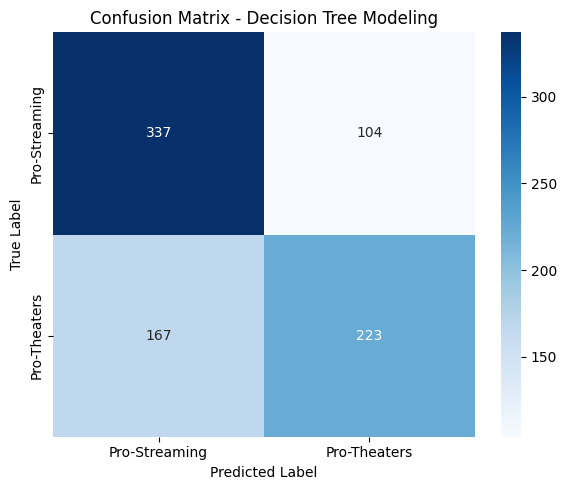

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Decision Tree Modeling")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [33]:
X_train.head()

able  access  accessible  according  account  across  act  action  \
3098   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
209    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
398    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
2387   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
1097   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers      year  yearold  years  yet  \
3098         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
209          0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
398          0.0    0.0  ...    0.0      0.0  0.178704      0.0    0.0  0.0   
2387         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
1097         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3098    0.0    0.0      0.0   0.0  
209     0.0    0.0      0.0   0.0  
398     0.0    0.0      0.0   0.0  
2387    0.0    0.0      0.0   0.0  
1097    0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [34]:
X_test.head()

able  access  accessible  according  account  across  act  action  \
3111   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3244   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3056   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3100   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
435    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers  year  yearold  years  yet  \
3111         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3244         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3056         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3100         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
435          0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3111    0.0    0.0      0.0   0.0  
3244    0.0    0.0      0.0   0.0  
3056    0.0    0.0      0.0   0.0  
3100    0.0    0.0      0.0   0.0  
435     0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [35]:
y_train.head()

view_label_encoded
3098                   1
209                    0
398                    1
2387                   0
1097                   0

In [36]:
y_test.head()

view_label_encoded
3111                   0
3243                   0
3056                   1
3100                   0
435                    1

**For better visualization purpose, reducing the sample size to 600 to improve readability**

In [31]:
# Reduce sample size to improve visibility of the tree structure
# We'll use only the first 300 samples for simplicity
X_small = X.head(600)
y_small = y_encoded[:600]

# Re-split smaller dataset
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small, test_size=0.25, random_state=42, stratify=y_small
)

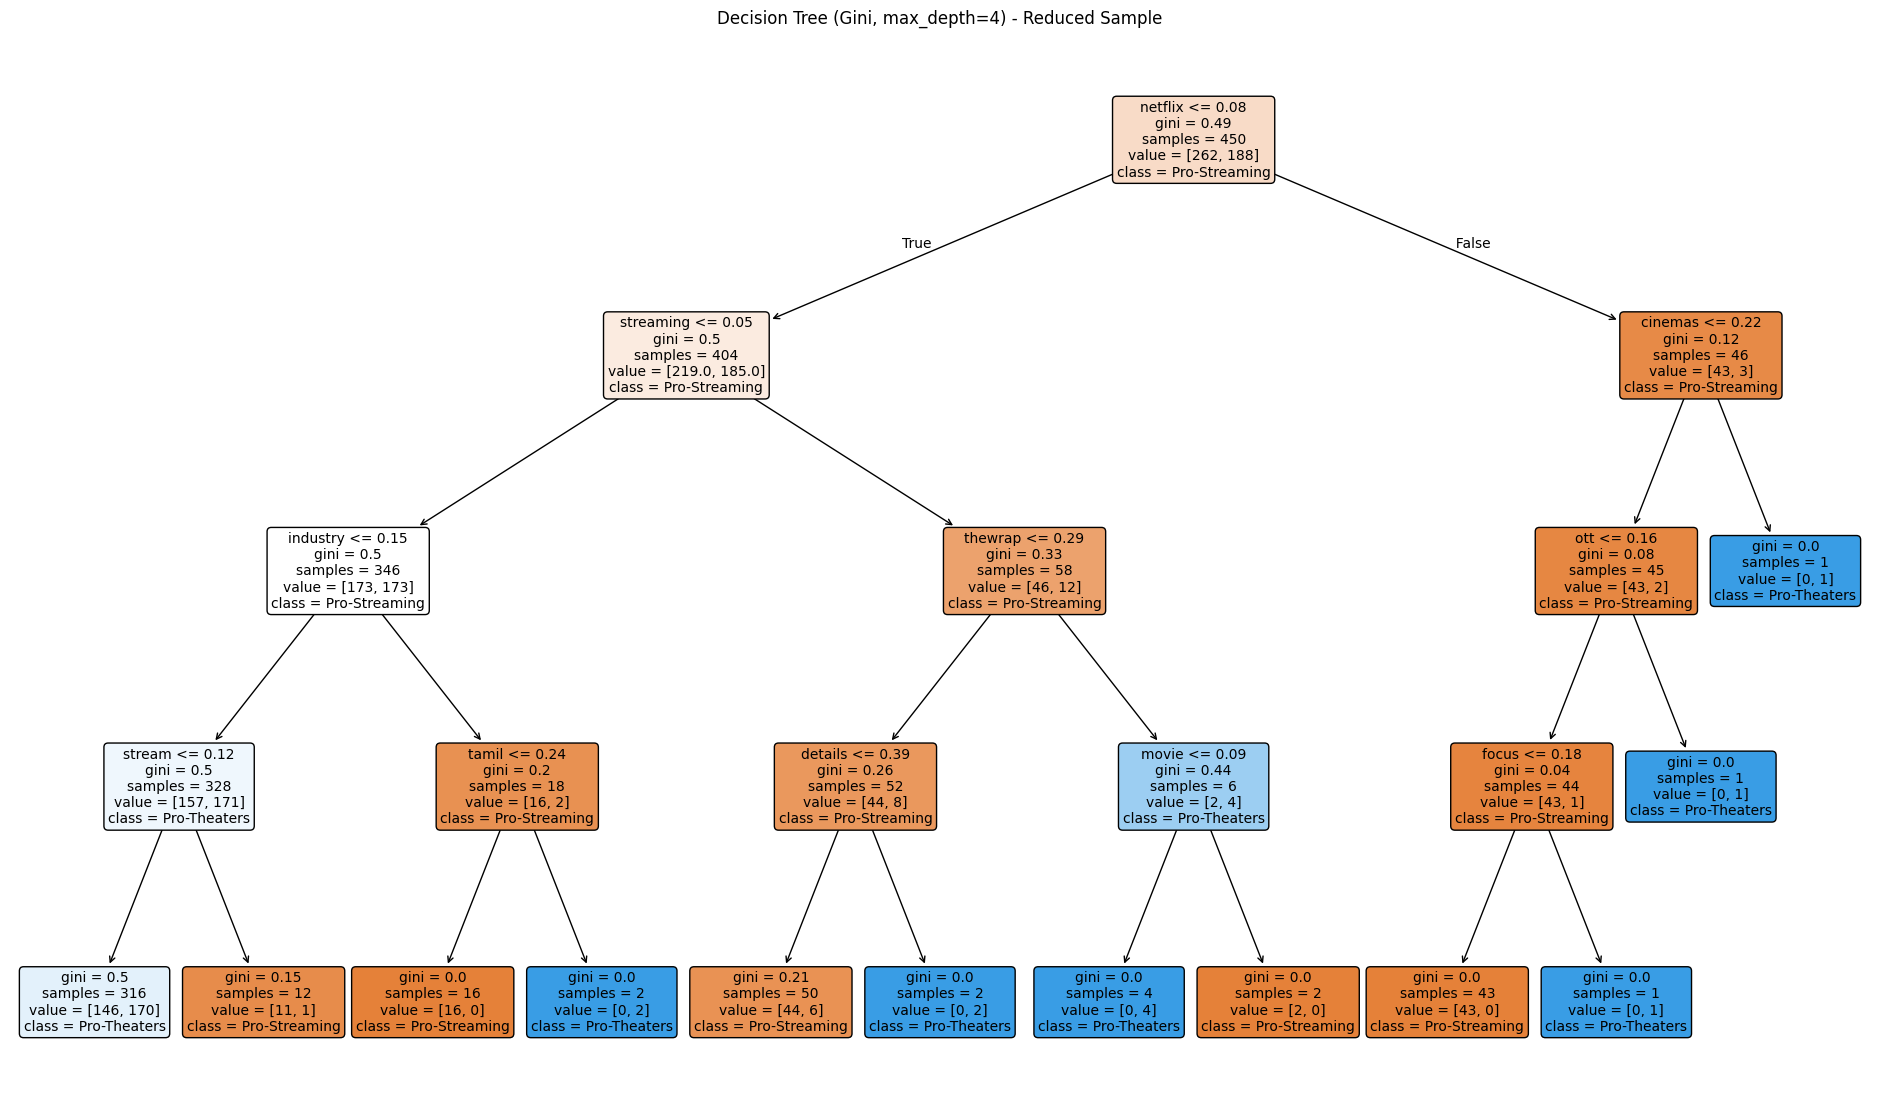

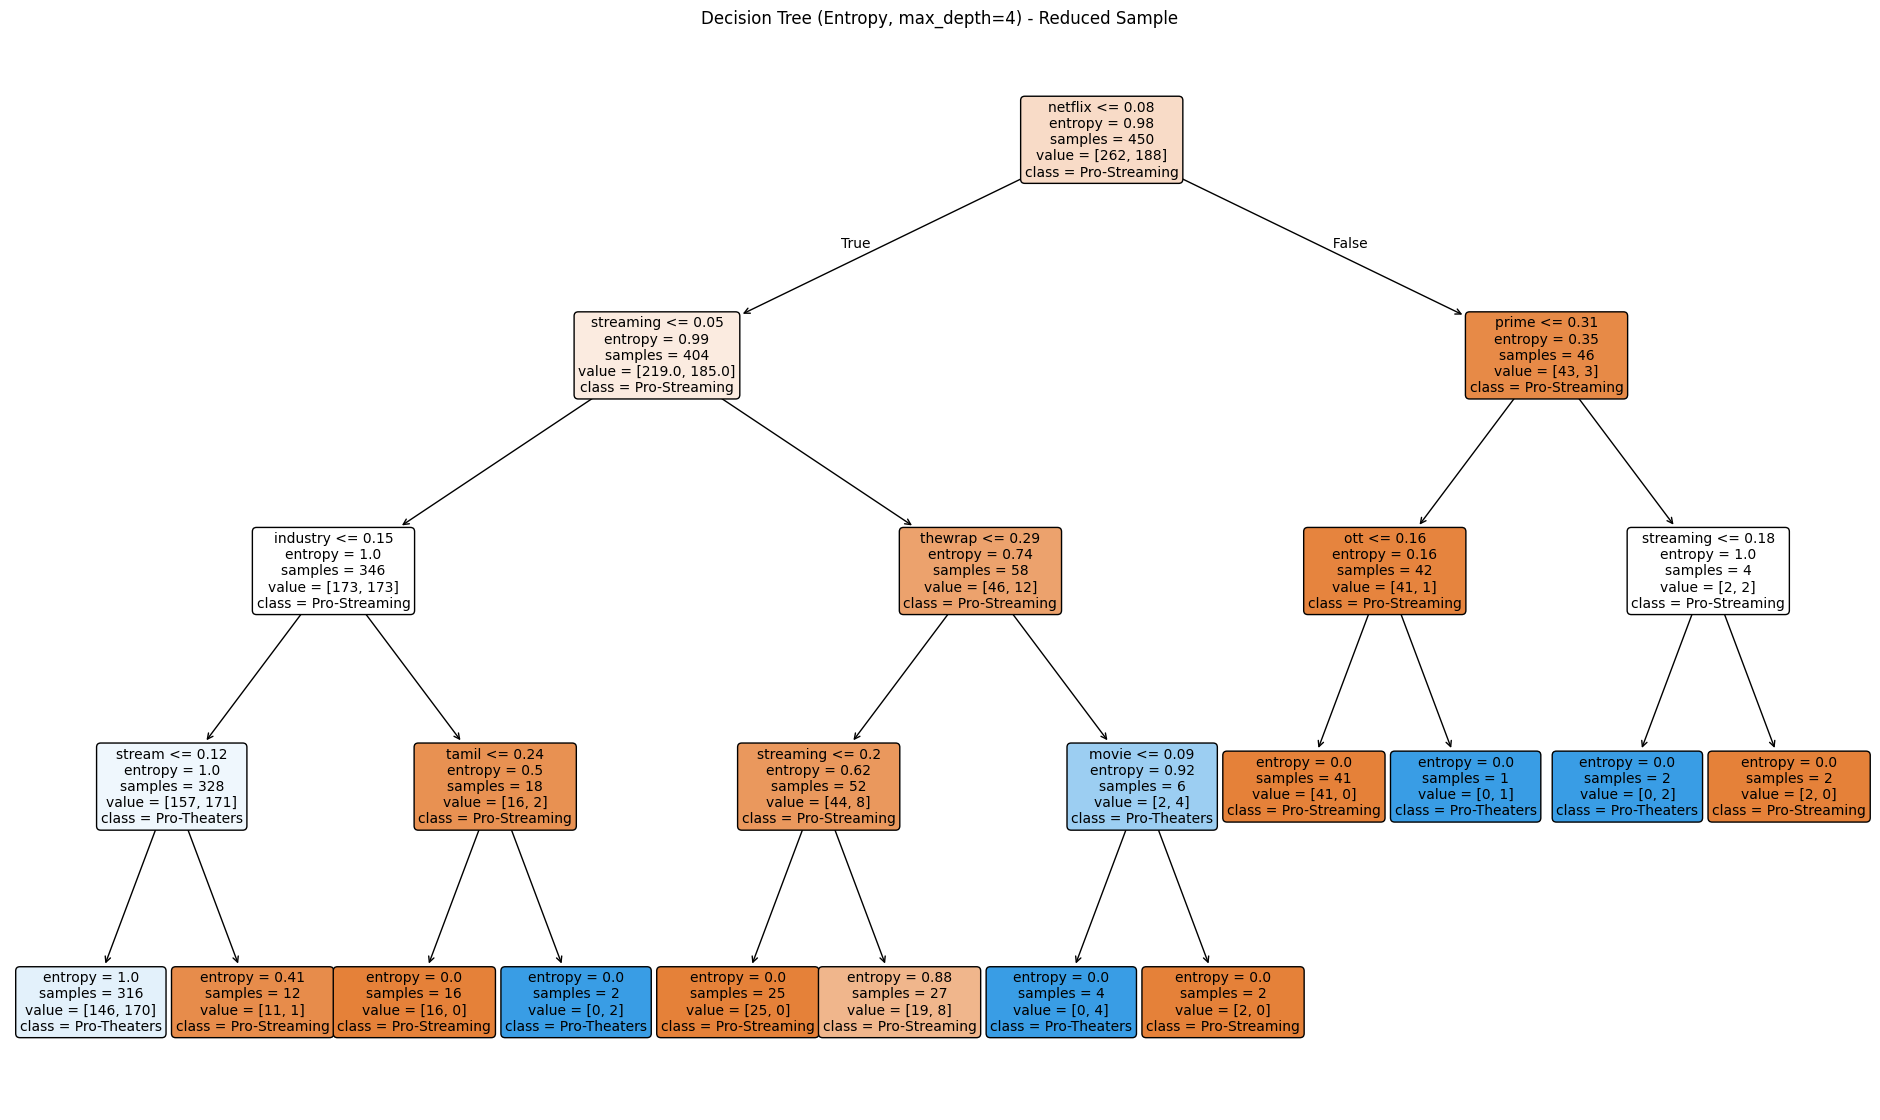

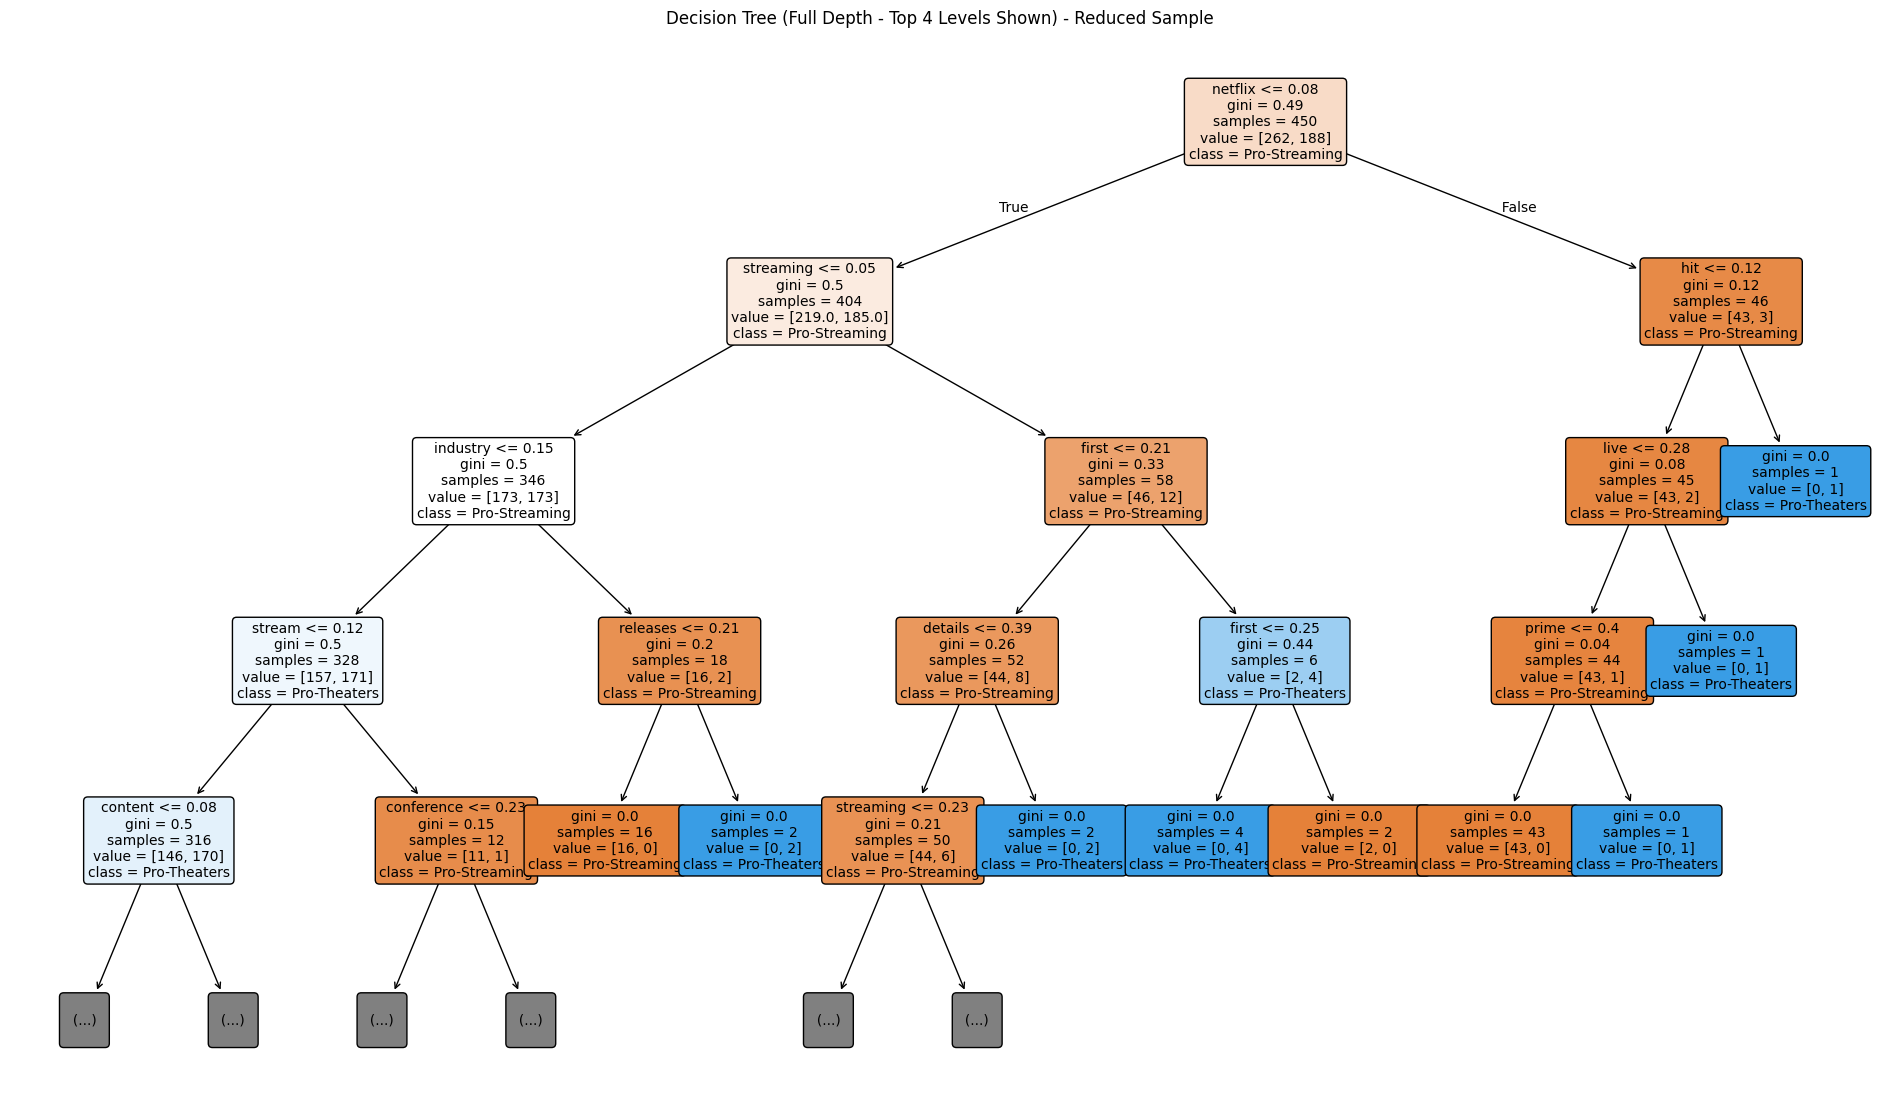

In [32]:
# Train all three types of trees on the reduced dataset
dt_small_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt_small_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
dt_small_full = DecisionTreeClassifier(criterion="gini", random_state=42)  # Full depth

# Fit all models
dt_small_gini.fit(X_train_small, y_train_small)
dt_small_entropy.fit(X_train_small, y_train_small)
dt_small_full.fit(X_train_small, y_train_small)

# Plot Gini Tree
plt.figure(figsize=(24, 14))
plot_tree(dt_small_gini, feature_names=X.columns.tolist(), class_names=label_encoder.classes_,
          filled=True, rounded=True, precision=2, fontsize=10)
plt.title("Decision Tree (Gini, max_depth=4) - Reduced Sample")
plt.show()

# Plot Entropy Tree
plt.figure(figsize=(24, 14))
plot_tree(dt_small_entropy, feature_names=X.columns.tolist(), class_names=label_encoder.classes_,
          filled=True, rounded=True, precision=2, fontsize=10)
plt.title("Decision Tree (Entropy, max_depth=4) - Reduced Sample")
plt.show()

# Plot Full Tree
plt.figure(figsize=(24, 14))
plot_tree(dt_small_full, feature_names=X.columns.tolist(), class_names=label_encoder.classes_,
          filled=True, rounded=True, precision=2, fontsize=10, max_depth=4)
plt.title("Decision Tree (Full Depth - Top 4 Levels Shown) - Reduced Sample")
plt.show()


## **SVM**

In [53]:
# Load the uploaded dataset for SVM work
file_path = "tfidf_vectorized_articles.csv"
df = pd.read_csv(file_path)

# Drop missing labels
df_clean = df.dropna(subset=["view_label"])

# Prepare features and target
X = df_clean.drop(columns=["topic_label", "view_label"])
y = df_clean["view_label"]

# Encode labels for classification
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_encoded_df = pd.DataFrame({'view_label_encoded': y_encoded})

# Stratified train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded_df, test_size=0.25, random_state=42, stratify=y_encoded
)


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Store evaluation results
svm_results = {}

# Define kernels and costs to try
kernel_list = ['linear', 'rbf', 'poly']
C_values = [0.1, 1.0, 10.0]

# Train and evaluate SVMs for each kernel and C
for kernel in kernel_list:
    for C_val in C_values:
        clf = SVC(kernel=kernel, C=C_val, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        conf = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
        key = f"{kernel}_C{C_val}"
        svm_results[key] = {"accuracy": acc, "conf_matrix": conf, "report": report}

# Show the best accuracy result
best_model = max(svm_results.items(), key=lambda x: x[1]["accuracy"])
best_model_key, best_model_data = best_model



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
best_model_key, best_model_data["accuracy"], best_model_data["conf_matrix"]

('rbf_C1.0',
 0.6979542719614922,
 array([[323, 118],
        [133, 257]]))

In [42]:
print(best_model_key)

rbf_C1.0


In [47]:
# Create a summary DataFrame for SVM kernel and cost combinations
svm_summary = []

for key, value in svm_results.items():
    kernel_type, C_val = key.split("_C")
    svm_summary.append({
        "Kernel": kernel_type,
        "Cost (C)": float(C_val),
        "Accuracy": round(value["accuracy"], 4)
    })

svm_df = pd.DataFrame(svm_summary).sort_values(by=["Accuracy"], ascending=False).reset_index(drop=True)



In [48]:
svm_df

Kernel  Cost (C)  Accuracy
0     rbf       1.0    0.6980
1     rbf      10.0    0.6847
2  linear       1.0    0.6787
3  linear       0.1    0.6751
4  linear      10.0    0.6582
5    poly       1.0    0.6570
6    poly      10.0    0.6498
7     rbf       0.1    0.5355
8    poly       0.1    0.5307

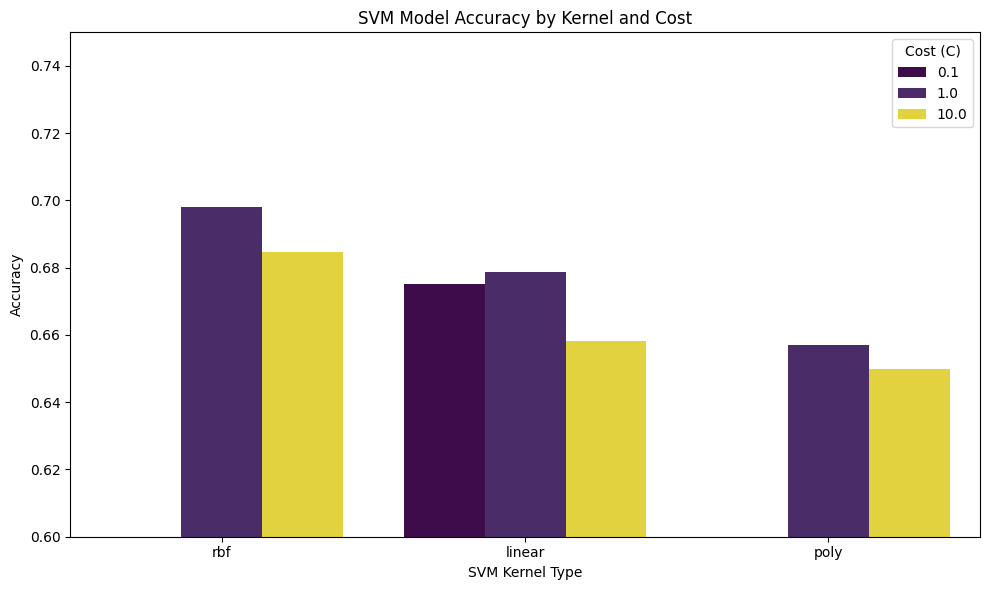

In [49]:
# Create a bar plot to visualize SVM model accuracy by kernel and cost
plt.figure(figsize=(10, 6))
sns.barplot(data=svm_df, x="Kernel", y="Accuracy", hue="Cost (C)", palette="viridis")
plt.title("SVM Model Accuracy by Kernel and Cost")
plt.ylim(0.6, 0.75)
plt.ylabel("Accuracy")
plt.xlabel("SVM Kernel Type")
plt.legend(title="Cost (C)")
plt.tight_layout()
plt.show()


               precision    recall  f1-score   support

Pro-Streaming       0.71      0.73      0.72       441
 Pro-Theaters       0.69      0.66      0.67       390

     accuracy                           0.70       831
    macro avg       0.70      0.70      0.70       831
 weighted avg       0.70      0.70      0.70       831



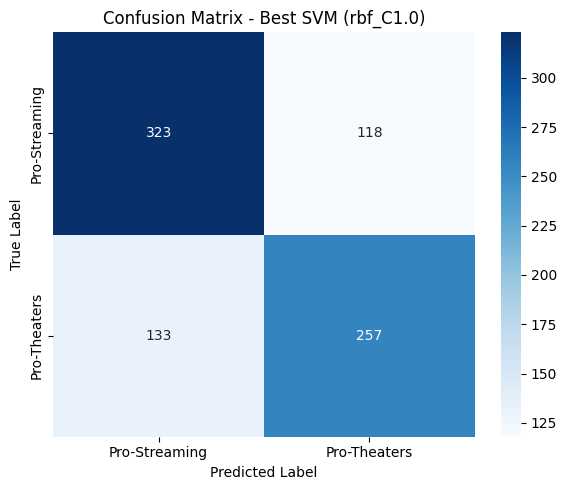

In [41]:
# Extract and print classification report of the best model
best_report = best_model_data["report"]
print(best_report)

# Plot confusion matrix for best model
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(best_model_data["conf_matrix"], annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix - Best SVM ({best_model_key})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [50]:
X_train.head()

able  access  accessible  according  account  across  act  action  \
3098   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
209    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
398    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
2387   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
1097   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers      year  yearold  years  yet  \
3098         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
209          0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
398          0.0    0.0  ...    0.0      0.0  0.178704      0.0    0.0  0.0   
2387         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   
1097         0.0    0.0  ...    0.0      0.0  0.000000      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3098    0.0    0.0      0.0   0.0  
209     0.0    0.0      0.0   0.0  
398     0.0    0.0      0.0   0.0  
2387    0.0    0.0      0.0   0.0  
1097    0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [51]:
X_test.head()

able  access  accessible  according  account  across  act  action  \
3111   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3244   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3056   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3100   0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   
435    0.0     0.0         0.0        0.0      0.0     0.0  0.0     0.0   

      activities  actor  ...  would  writers  year  yearold  years  yet  \
3111         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3244         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3056         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
3100         0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   
435          0.0    0.0  ...    0.0      0.0   0.0      0.0    0.0  0.0   

      young  youre  youtube  yuan  
3111    0.0    0.0      0.0   0.0  
3244    0.0    0.0      0.0   0.0  
3056    0.0    0.0      0.0   0.0  
3100    0.0    0.0      0.0   0.0  
435     0.0    0.0      0.0   0.0  

[5 rows x 1000 columns]

In [54]:
y_train.head()

view_label_encoded
3098                   1
209                    0
398                    1
2387                   0
1097                   0

In [56]:
y_test.head()

view_label_encoded
3111                   0
3243                   0
3056                   1
3100                   0
435                    1